<img src="https://i.postimg.cc/qMWR3d1G/logo.png" width="300" height="200"/>

<h1> Análise estratégica baseada em dados</h1> 

Ao adotar uma abordagem **baseada em dados** para a gestão de vendas, é possível identificar os principais **padrões**, **tendências** e **oportunidades** do negócio. Além disso, uma boa análise de dados deve mostrar: quem são seus **principais clientes**, quais os produtos **mais populares** e **rentáveis**, quais departamentos estão apresentando **melhores retornos**, quando houve **queda no faturamento**, entre outras informações que ajudam a melhorar a tomada de decisão.

Com isso, neste estudo de caso utilizo um dataset retirado do [Kaggle](https://www.kaggle.com/datasets/ahmedterry/bikedata?resource=download) contendo dados sobre a vendas de produtos de uma **loja de bicicletas e acessórios** ao longo dos anos. A partir destes dados foram gerados insights e sugestões de melhorias para apoiar as decisões estratégicas do negócio.

<img src="https://i.postimg.cc/yxddF6qL/bike.jpg" style="width:500px;height:280px">

## Carregando Bibliotecas e configurações inciais

##### 1) Carregando Bibliotecas:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

##### 2) Configurações

In [2]:
pd.set_option("display.max_columns", None) #comando para exibir todas as colunas do dataframe
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,6)})

##### 3) Carregando os dados em CSV

In [3]:
sales = pd.read_csv(
    'data/sales_data.csv',
    parse_dates=['Date']) #Transforma a coluna "Date" em data

## Conhecendo e tratando os dados:

In [5]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


##### Checando quantidade de linhas e colunas do DataFrame:

In [6]:
sales.shape

(113036, 18)

##### Verificando informações: tipos de dados, quantidade, dados faltantes, etc:

In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

In [8]:
sales.isnull().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Day'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Customer_Age'}>,
        <AxesSubplot:title={'center':'Order_Quantity'}>,
        <AxesSubplot:title={'center':'Unit_Cost'}>],
       [<AxesSubplot:title={'center':'Unit_Price'}>,
        <AxesSubplot:title={'center':'Profit'}>,
        <AxesSubplot:title={'center':'Cost'}>],
       [<AxesSubplot:title={'center':'Revenue'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

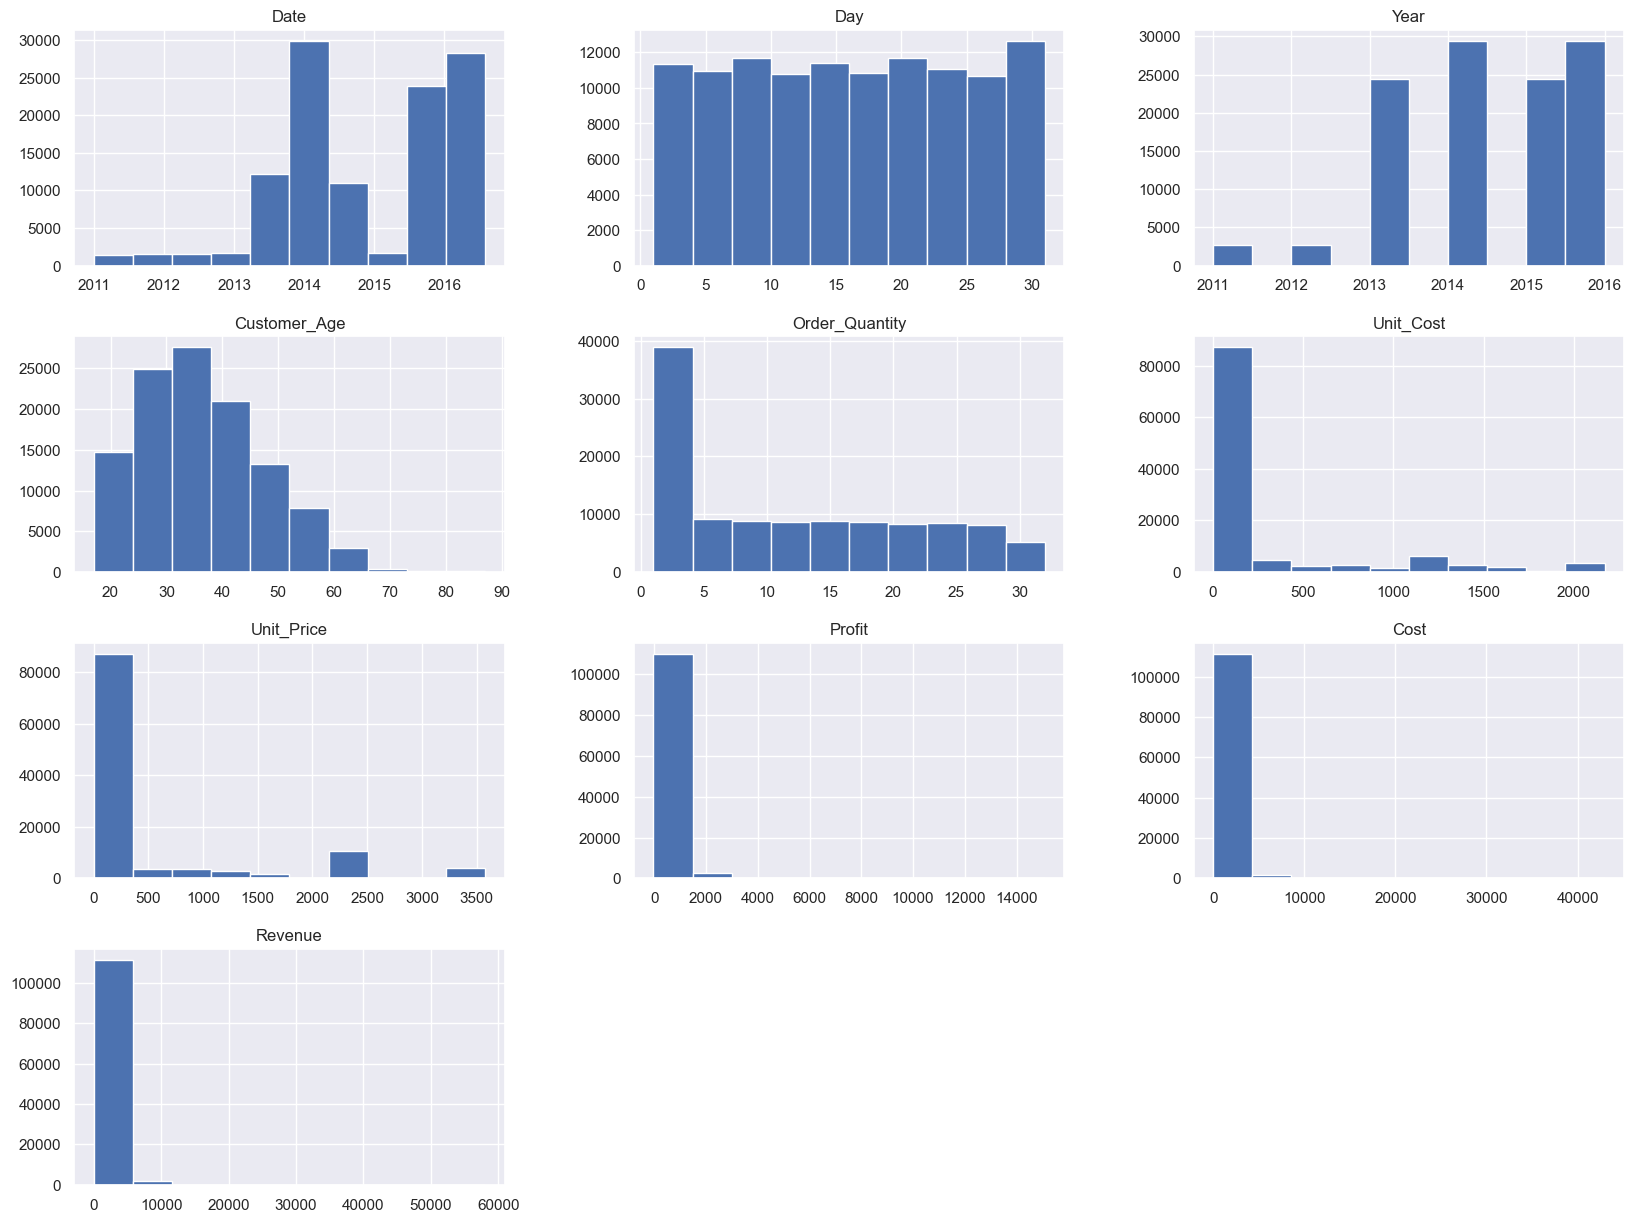

In [9]:
sales.hist(figsize=(20,15))

Order_Quantity       AxesSubplot(0.125,0.53;0.227941x0.35)
Unit_Cost         AxesSubplot(0.398529,0.53;0.227941x0.35)
Unit_Price        AxesSubplot(0.672059,0.53;0.227941x0.35)
Cost                 AxesSubplot(0.125,0.11;0.227941x0.35)
Profit            AxesSubplot(0.398529,0.11;0.227941x0.35)
Revenue           AxesSubplot(0.672059,0.11;0.227941x0.35)
dtype: object

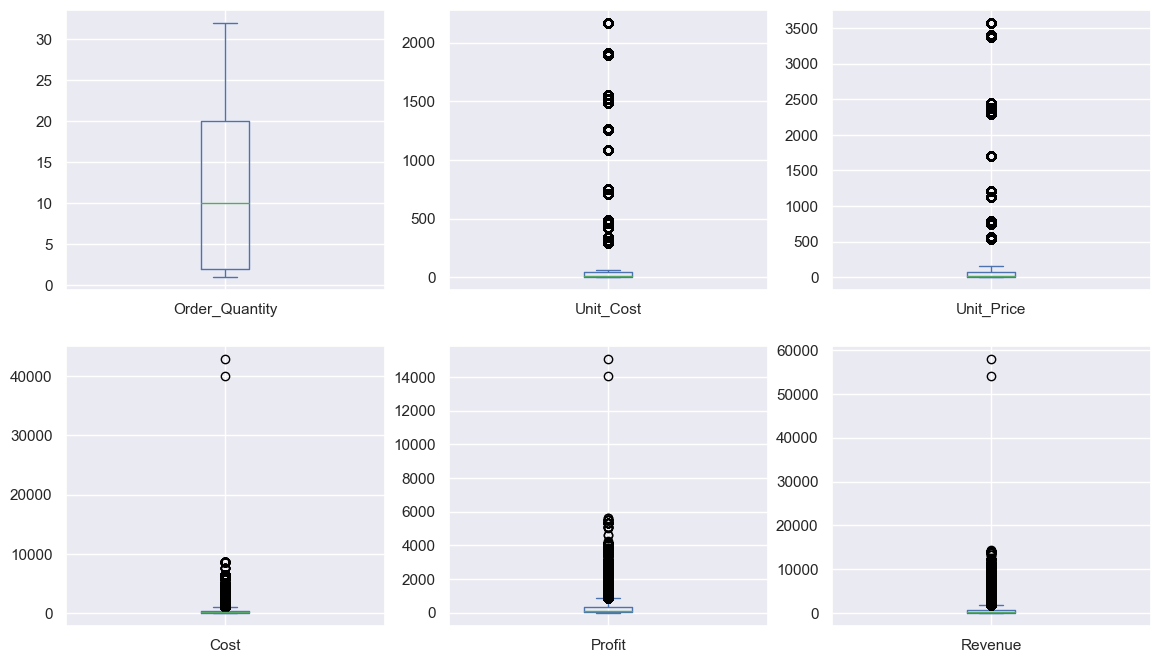

In [10]:
boxplot_cols = ['Order_Quantity', 'Unit_Cost', 'Unit_Price','Cost', 'Profit', 'Revenue']

sales[boxplot_cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(14,8))

Avaliando o boxplot dos indicadores, foi escolhido aqui **manter todos os valores**, mesmo visualizando a existência de **Outrliers**, pois estes podem representar produtos **muito mais caro** e **específicos** que a maioria ou **compras em grandes quantidades.**

In [11]:
test = sales.loc[(sales['Revenue'] > 50000)]
test.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
112072,2013-07-24,24,July,2013,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",27,1482,2384,14055,40014,54069
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58074


In [12]:
test2 = sales.loc[(sales['Unit_Price'] > 2000)]
test2.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
49304,2013-01-28,28,January,2013,31,Young Adults (25-34),M,Australia,Queensland,Bikes,Mountain Bikes,"Mountain-100 Silver, 38",1,1912,3400,944,1912,2856
49305,2015-01-28,28,January,2015,31,Young Adults (25-34),M,Australia,Queensland,Bikes,Mountain Bikes,"Mountain-100 Silver, 38",1,1912,3400,944,1912,2856
49306,2013-07-22,22,July,2013,31,Young Adults (25-34),M,Australia,Queensland,Bikes,Mountain Bikes,"Mountain-100 Silver, 38",1,1912,3400,944,1912,2856
49307,2015-07-22,22,July,2015,31,Young Adults (25-34),M,Australia,Queensland,Bikes,Mountain Bikes,"Mountain-100 Silver, 38",2,1912,3400,1888,3824,5712
49308,2013-12-25,25,December,2013,31,Young Adults (25-34),M,Australia,Queensland,Bikes,Mountain Bikes,"Mountain-100 Silver, 38",1,1912,3400,944,1912,2856


## Extraindo informações sobre as vendas:

### 1) Qual o melhor mês para vendas?

In [13]:
sales_month = sales.groupby('Month')[['Order_Quantity','Revenue']].sum()
sales_month = sales_month.sort_values(by='Revenue', ascending=False)

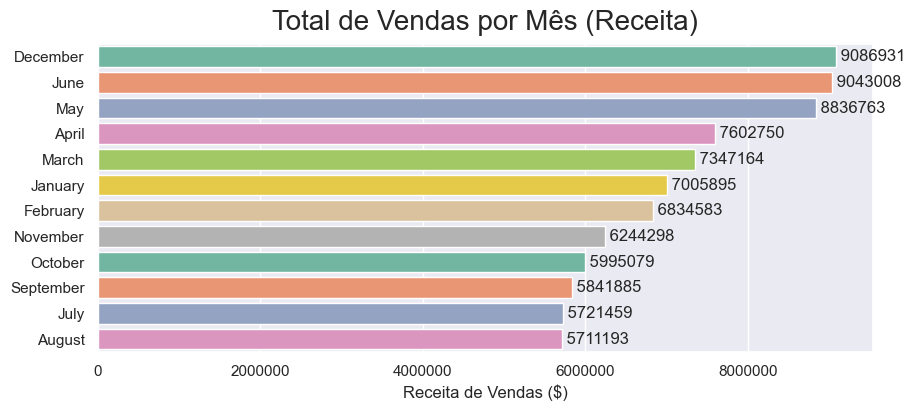

In [14]:
plt.figure(figsize=(10,4), dpi=100)

ax = sns.barplot(y = sales_month.index , x = sales_month['Revenue'], data = sales_month, palette="Set2")
ax.bar_label(ax.containers[0], fmt = ' %d')
plt.title( "Total de Vendas por Mês (Receita)" , fontsize=20, pad=10) 
plt.ylabel( "" , size = 12 )
plt.xlabel( "Receita de Vendas ($)" , size = 12 ) 
plt.ticklabel_format(style='plain', axis='x')



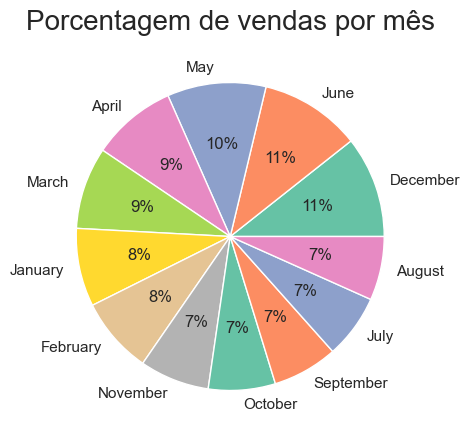

In [15]:
colors = sns.color_palette("Set2")
plt.figure(figsize=(14,5), dpi=100)

plt.pie(sales_month['Revenue'], labels = sales_month.index, autopct='%.0f%%', colors = colors)
plt.ylabel("", size = 12)
#plt.xlabel("Porcentagem de vendas", size = 12)
plt.title("Porcentagem de vendas por mês", fontsize=20, pad=10)

plt.show()

### 2) Quais países geram melhores receita?

In [16]:
sales_country = sales.groupby('Country')[['Revenue']].sum()
sales_country = sales_country.sort_values(by='Revenue', ascending=False)

In [17]:
sales_country.head()

,Revenue
Country,
United States,27975547
Australia,21302059
United Kingdom,10646196
Germany,8978596
France,8432872


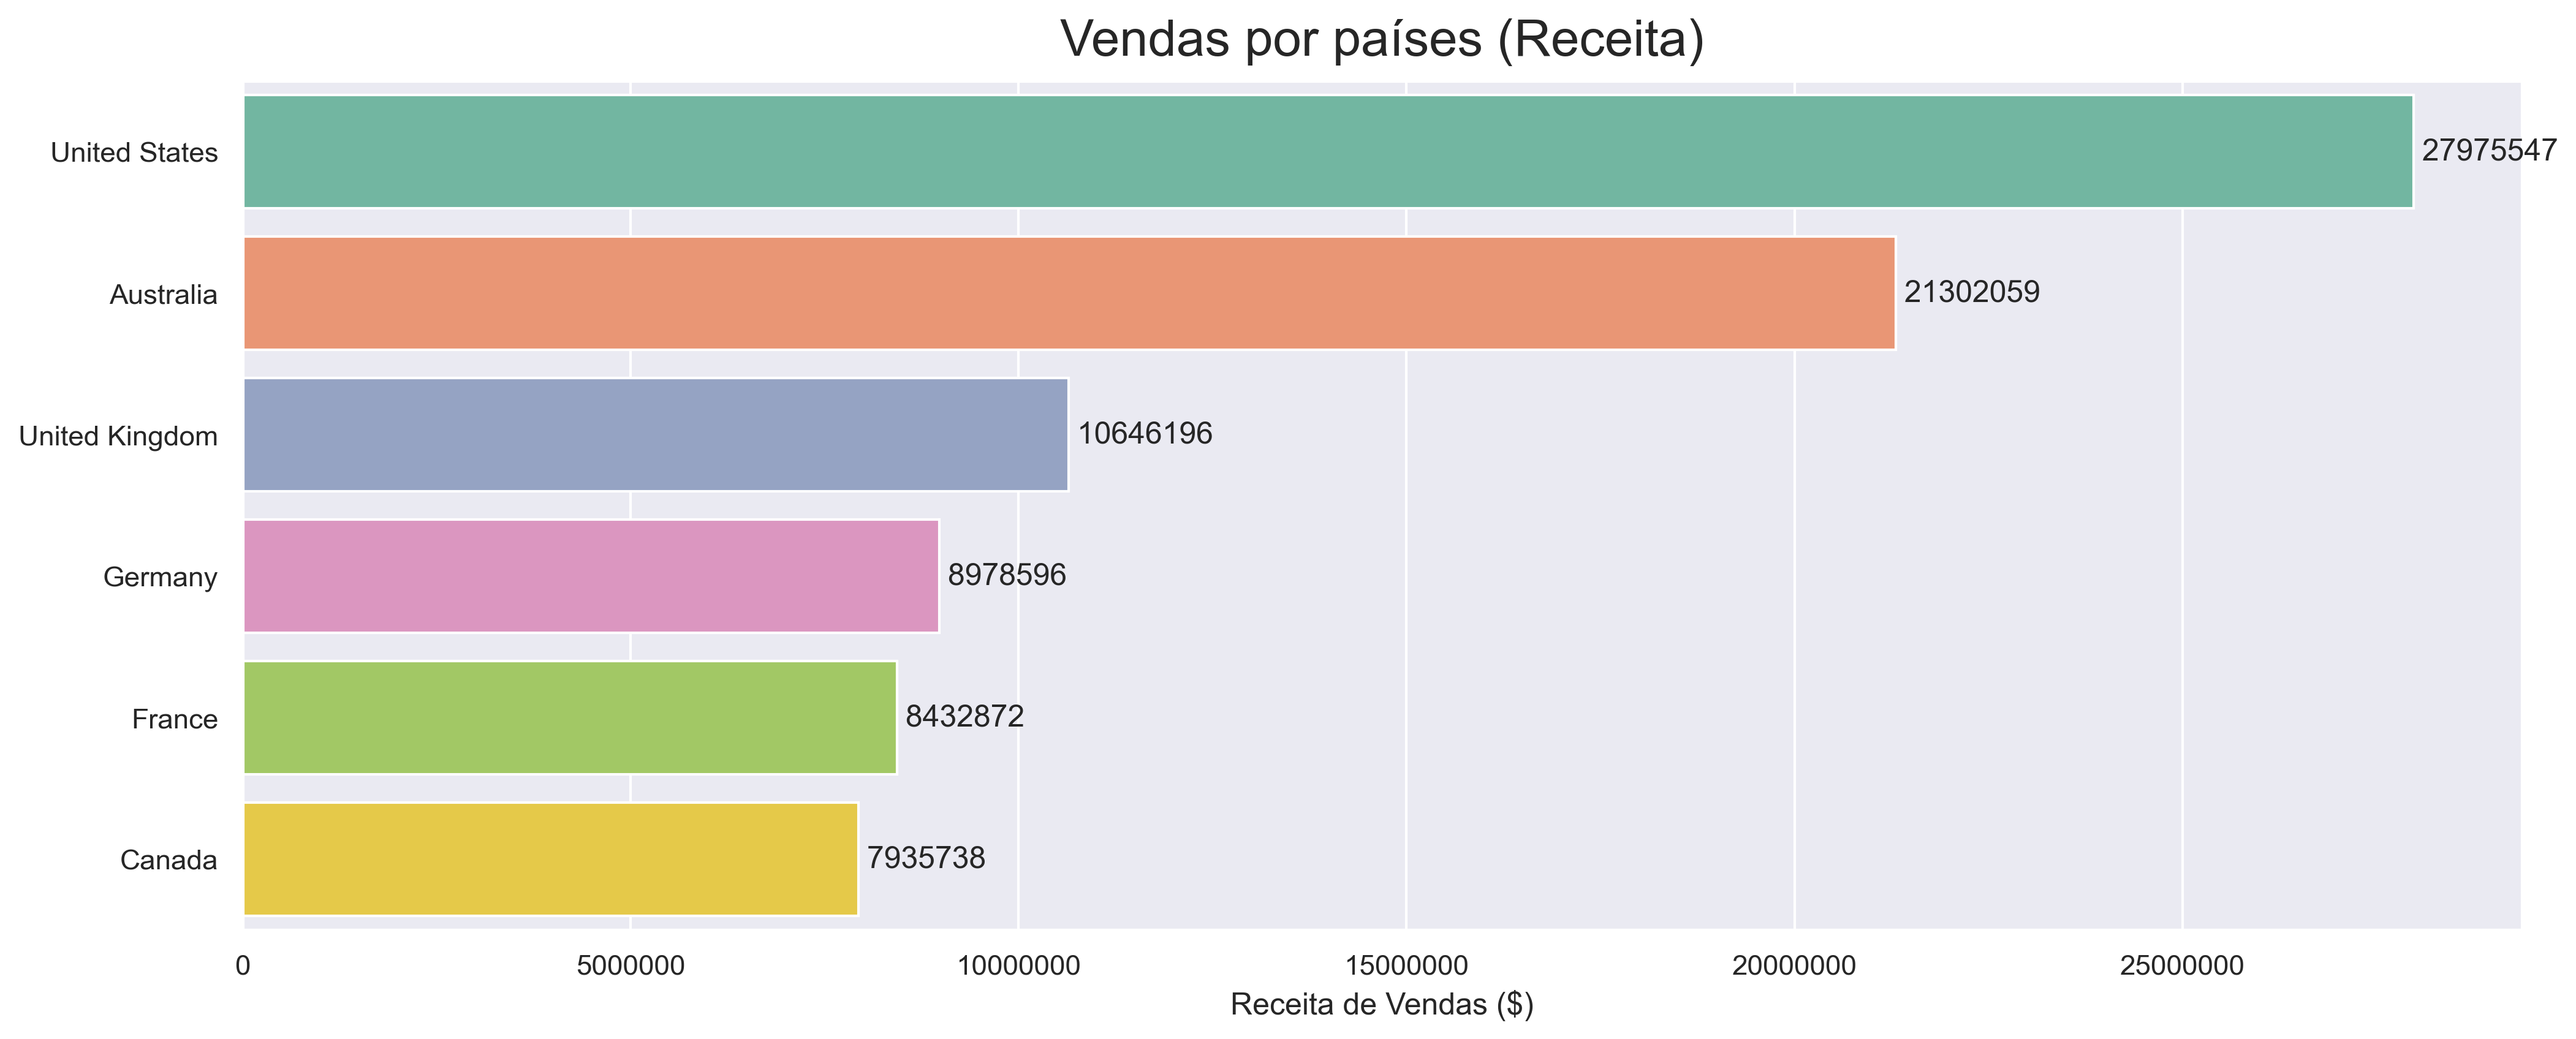

In [18]:
plt.figure(figsize=(16,6), dpi=300)

plt.xticks(rotation=0)
ax = sns.barplot(y = sales_country.index , x = sales_country['Revenue'], data = sales_country, palette="Set2")
ax.bar_label(ax.containers[0], fmt = ' %d')
plt.title( "Vendas por países (Receita)" , fontsize=20, pad=10) 
plt.ylabel( "" , size = 12 )
plt.xlabel( "Receita de Vendas ($)" , size = 12 ) 
plt.ticklabel_format(style='plain', axis='x')


In [19]:
country = sales_country.index[0]
sales_country_receita = sales.loc[(sales['Country'] == country)].groupby('Country')[['Revenue']].sum()
country_receita = sales_country_receita['Revenue'].to_list()
country_receita = country_receita[0]
total_receita = sales['Revenue'].sum()
porcentagem_country_receita = (country_receita/total_receita) *100
print(f"A Receita do '{country}' representa cerca de %d%% sobre o total da receita de vendas" %porcentagem_country_receita)

A Receita do 'United States' representa cerca de 32% sobre o total da receita de vendas


### 3) Quais estados tem as maiores receitas?

In [20]:
sales_state = sales.groupby('State')[['Revenue']].sum()
sales_state= sales_state.sort_values(by='Revenue', ascending=False)
sales_state = sales_state.iloc[:10]

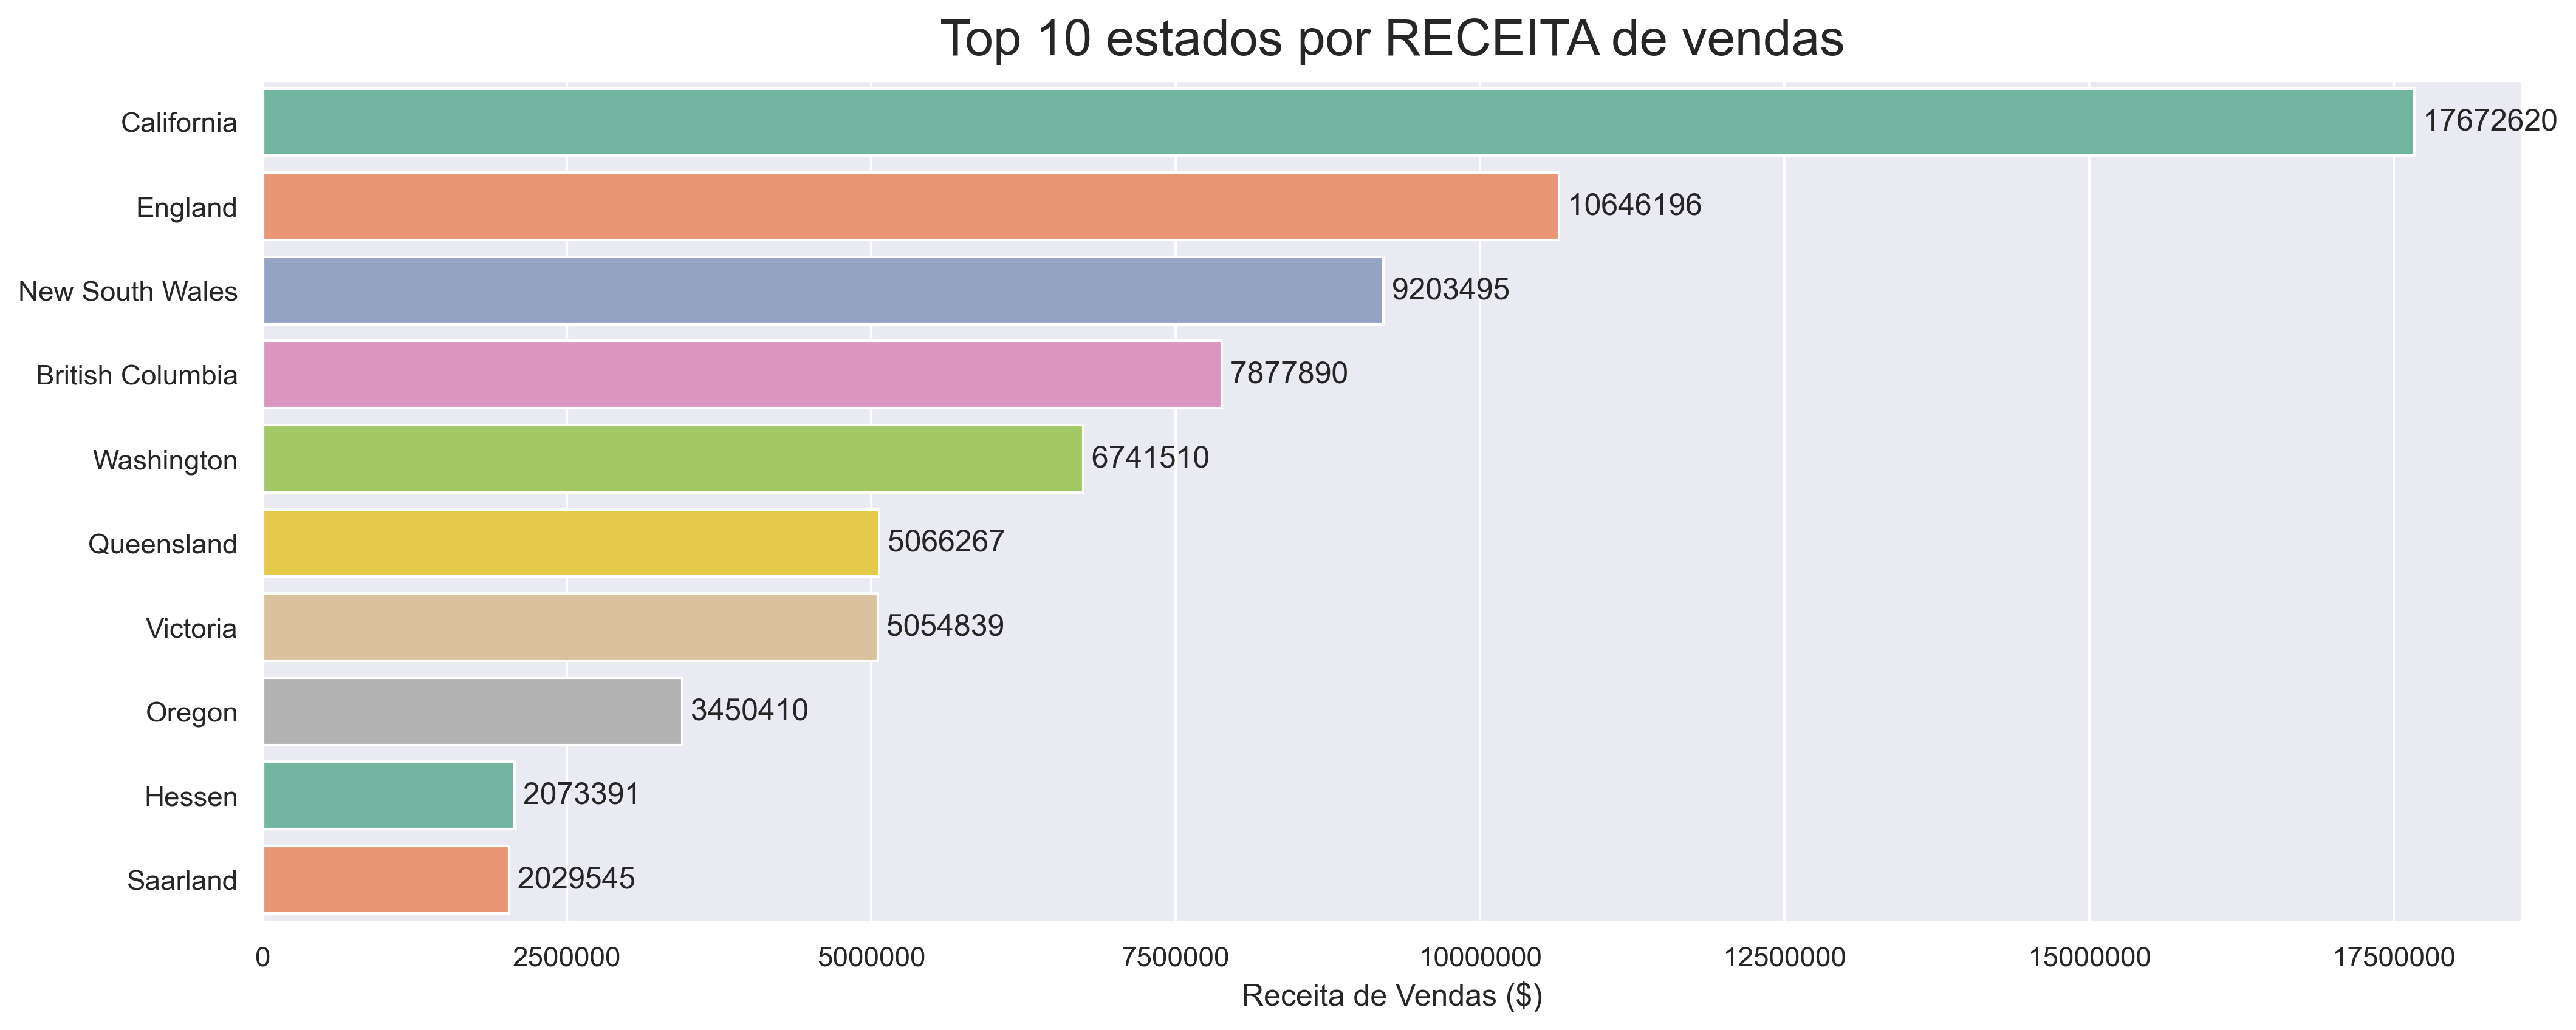

In [21]:
plt.figure(figsize=(16,6), dpi=300)

plt.xticks(rotation=0)
ax = sns.barplot(y = sales_state.index , x = sales_state['Revenue'], data = sales_state, palette="Set2")
ax.bar_label(ax.containers[0], fmt = ' %d')
plt.title( "Top 10 estados por RECEITA de vendas" , fontsize=20, pad=10) 
plt.ylabel( "" , size = 12 )
plt.xlabel( "Receita de Vendas ($)" , size = 12 ) 
plt.ticklabel_format(style='plain', axis='x')


In [22]:
state = sales_state.index[0]
sales_state_receita = sales.loc[(sales['State'] == state)].groupby('State')[['Revenue']].sum()
state_receita = sales_state_receita['Revenue'].to_list()
state_receita = state_receita[0]
total_receita = sales['Revenue'].sum()
porcentagem_state_receita = (state_receita/total_receita) *100
print(f"A Receita da '{state}' representa cerca de %d%% sobre o total do faturamento" %porcentagem_state_receita)

A Receita da 'California' representa cerca de 20% sobre o total do faturamento


### 4) Qual categoria de produtos é vital para a empresa e por quê?

In [23]:
sales_category = sales.groupby('Product_Category')[['Revenue','Order_Quantity']].sum()
sales_category = sales_category.sort_values(by='Revenue', ascending=False)

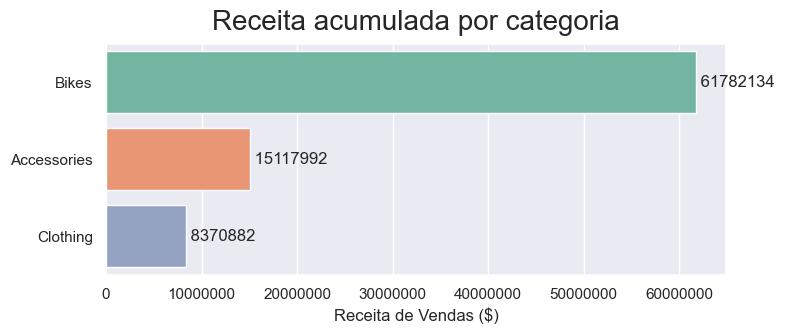

In [24]:
plt.figure(figsize=(8,3), dpi=100)

plt.xticks(rotation=0)
ax = sns.barplot(y = sales_category.index , x = sales_category['Revenue'], data = sales_category, palette="Set2")
ax.bar_label(ax.containers[0], fmt = ' %d')
plt.title( "Receita acumulada por categoria" , fontsize=20, pad=10) 
plt.ylabel( "" , size = 12 )
plt.xlabel( "Receita de Vendas ($)" , size = 12 ) 
plt.ticklabel_format(style='plain', axis='x')

In [25]:
categoria = sales_category.index[0]
sales_categoria_receita = sales.loc[(sales['Product_Category'] == categoria)].groupby('Product_Category')[['Revenue']].sum()
categoria_receita = sales_categoria_receita['Revenue'].to_list()
categoria_receita = categoria_receita[0]
total_receita = sales['Revenue'].sum()
porcentagem_do_categoria_receita = (categoria_receita/total_receita) *100
print(f"A categoria '{categoria}' representa cerca de %d%% sobre o total da receita" %porcentagem_do_categoria_receita)

A categoria 'Bikes' representa cerca de 72% sobre o total da receita


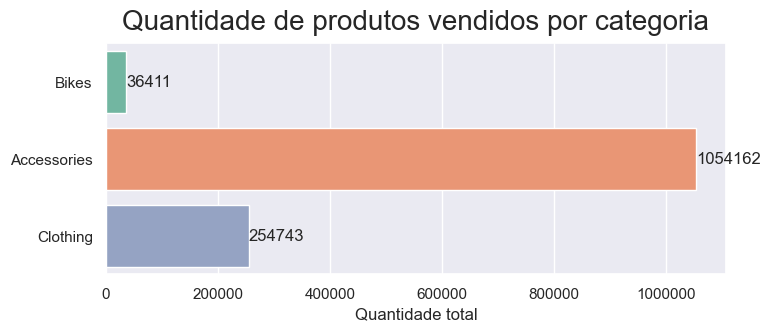

In [26]:
plt.figure(figsize=(8,3), dpi=100)

plt.xticks(rotation=0)
ax = sns.barplot(y = sales_category.index , x = sales_category['Order_Quantity'], data = sales_category, palette="Set2")
ax.bar_label(ax.containers[0], fmt = '%d')
plt.title( "Quantidade de produtos vendidos por categoria" , fontsize=20, pad=10) 
plt.ylabel( "" , size = 12 )
plt.xlabel( "Quantidade total" , size = 12 ) 
plt.ticklabel_format(style='plain', axis='x')

In [27]:
categoria = sales_category.index[1]
sales_categoria_receita = sales.loc[(sales['Product_Category'] == categoria)].groupby('Product_Category')[['Order_Quantity']].sum()
categoria_receita = sales_categoria_receita['Order_Quantity'].to_list()
categoria_receita = categoria_receita[0]
total_receita = sales['Order_Quantity'].sum()
porcentagem_do_categoria_receita = (categoria_receita/total_receita) *100
print(f"A categoria '{categoria}' representa cerca de %d%% sobre o total de vendas" %porcentagem_do_categoria_receita)

A categoria 'Accessories' representa cerca de 78% sobre o total de vendas


### 5) Quais produtos venderam mais, em termos de quantidade? Existe alguma explicação?

In [28]:
sales_prod = sales.groupby('Product')[['Order_Quantity','Revenue']].sum()
sales_prod = sales_prod.sort_values(by='Order_Quantity', ascending=False)
sales_prod = sales_prod.iloc[:10]

In [29]:
sales_prod.head()

,Order_Quantity,Revenue
Product,,
Water Bottle - 30 oz.,164086,746015
Patch Kit/8 Patches,157583,283863
Mountain Tire Tube,102792,469939
AWC Logo Cap,67316,549220
"Sport-100 Helmet, Red",63663,2019021


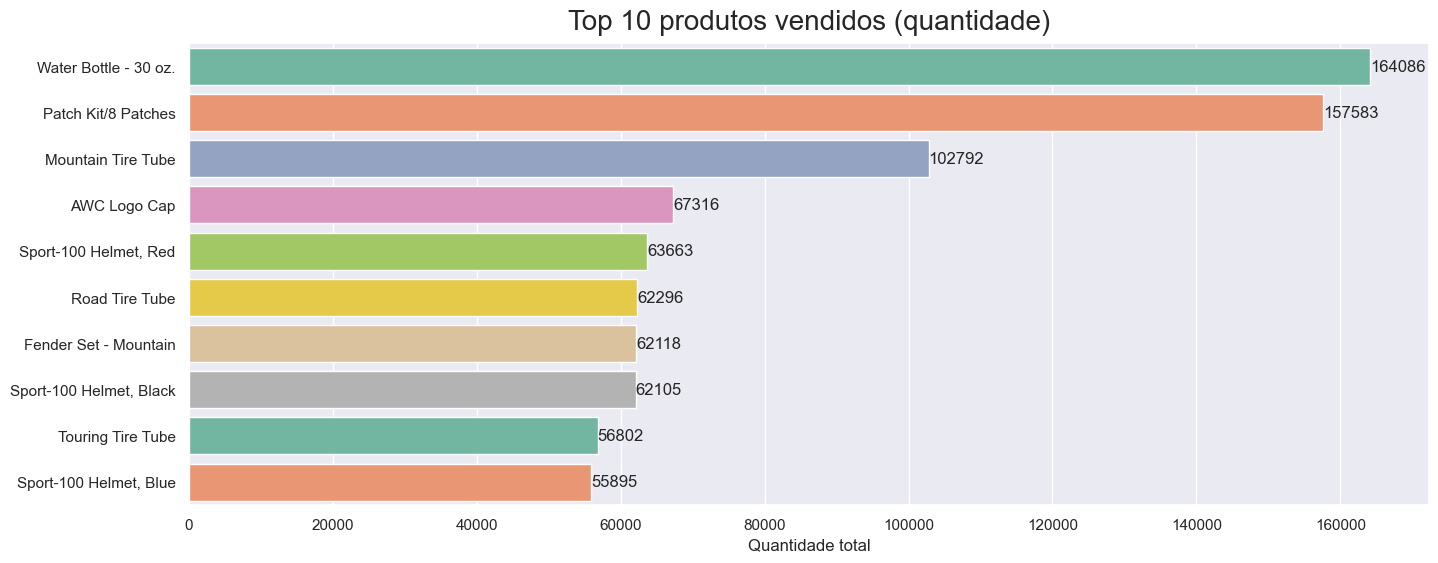

In [30]:
plt.figure(figsize=(16,6), dpi=100)

plt.xticks(rotation=0)
ax = sns.barplot(y = sales_prod.index , x = sales_prod['Order_Quantity'], data = sales_prod, palette="Set2")
ax.bar_label(ax.containers[0], fmt = '%d')
plt.title( "Top 10 produtos vendidos (quantidade)" , fontsize=20, pad=10) 
plt.ylabel( "" , size = 12 )
plt.xlabel( "Quantidade total" , size = 12 ) 
plt.ticklabel_format(style='plain', axis='x')


In [31]:
for i in range(10):
    sales_prod1 = sales.loc[(sales['Product'] == sales_prod.index[i])]
    print(f"O produto '{sales_prod.index[i]}' possui preço médio de $ {sales_prod1.loc[:, 'Unit_Price'].mean()}")

O produto 'Water Bottle - 30 oz.' possui preço médio de $ 5.0
O produto 'Patch Kit/8 Patches' possui preço médio de $ 2.0
O produto 'Mountain Tire Tube' possui preço médio de $ 5.0
O produto 'AWC Logo Cap' possui preço médio de $ 9.0
O produto 'Sport-100 Helmet, Red' possui preço médio de $ 35.0
O produto 'Road Tire Tube' possui preço médio de $ 4.0
O produto 'Fender Set - Mountain' possui preço médio de $ 22.0
O produto 'Sport-100 Helmet, Black' possui preço médio de $ 35.0
O produto 'Touring Tire Tube' possui preço médio de $ 5.0
O produto 'Sport-100 Helmet, Blue' possui preço médio de $ 35.0


In [32]:
soma_preços = 0
for i in range(10):
    sales_prod1 = sales.loc[(sales['Product'] == sales_prod.index[i])]
    soma_preços = soma_preços + sales_prod1.loc[:, 'Unit_Price'].mean()

print(f'A média de preços dos 10 produtos mais vendidos foi: ${soma_preços/10}')
print('Com isso nota-se que os produtos mais vendidos estão entre os mais baratos do catálogo')

A média de preços dos 10 produtos mais vendidos foi: $15.7
Com isso nota-se que os produtos mais vendidos estão entre os mais baratos do catálogo


### 6) Quais produtos geram MAIORES RECEITAS?

In [33]:
sales_maiores_receita = sales.groupby('Product')[['Order_Quantity','Revenue']].sum()
sales_maiores_receita = sales_maiores_receita.sort_values(by='Revenue', ascending=False)
sales_maiores_receita = sales_maiores_receita.iloc[:10]

In [34]:
sales_maiores_receita.head()

,Order_Quantity,Revenue
Product,,
"Road-150 Red, 62",1191,3829416
"Mountain-200 Black, 38",1642,3366248
"Road-150 Red, 52",980,3180840
"Road-150 Red, 56",990,3158805
"Mountain-200 Silver, 42",1461,3081078


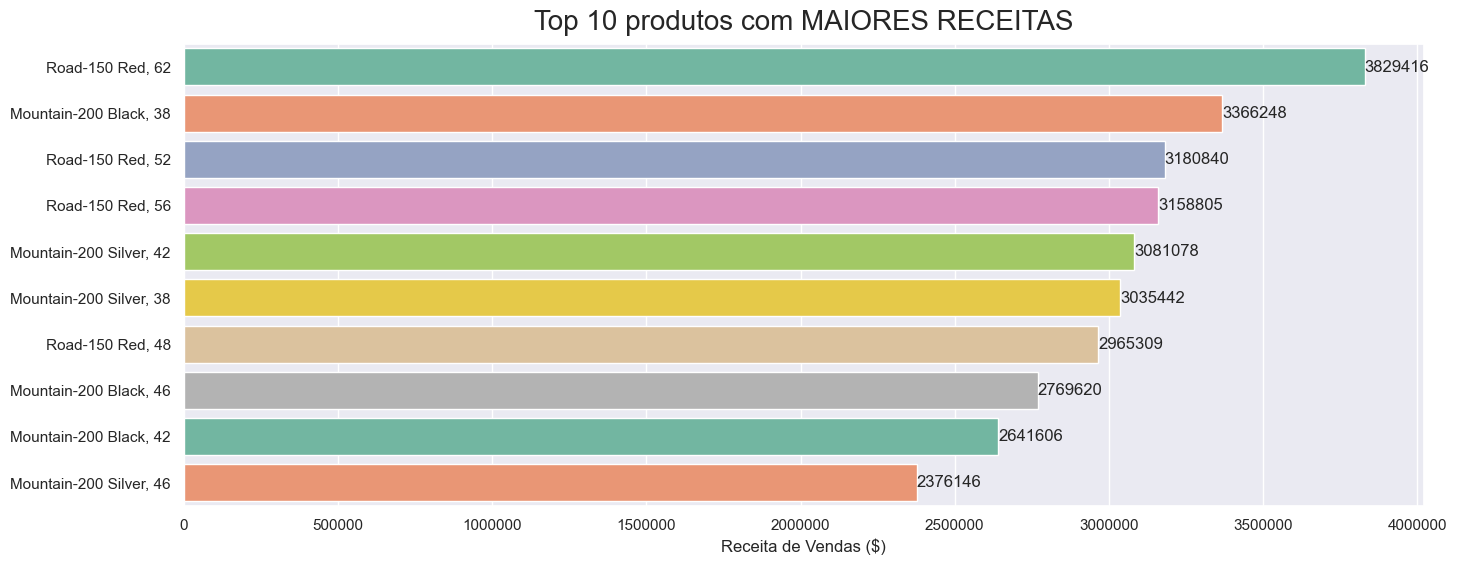

In [35]:
plt.figure(figsize=(16,6), dpi=100)

plt.xticks(rotation=0)
ax = sns.barplot(y = sales_maiores_receita.index , x = sales_maiores_receita['Revenue'], data = sales_maiores_receita, palette="Set2")
ax.bar_label(ax.containers[0], fmt = '%d')
plt.title( "Top 10 produtos com MAIORES RECEITAS" , fontsize=20, pad=10) 
plt.ylabel( "" , size = 12 )
plt.xlabel( "Receita de Vendas ($)" , size = 12 ) 
plt.ticklabel_format(style='plain', axis='x')

In [36]:
prod = sales_maiores_receita.index[0]
sales_prod_receita = sales.loc[(sales['Product'] == prod)].groupby('Product')[['Revenue']].sum()
prod_receita = sales_prod_receita['Revenue'].to_list()
prod_receita = prod_receita[0]
total_receita = sales['Revenue'].sum()
porcentagem_do_prod_receita = (prod_receita/total_receita) *100
print(f"O produto '{prod}' representa cerca de %d%% sobre o total da receita de vendas" %porcentagem_do_prod_receita)

O produto 'Road-150 Red, 62' representa cerca de 4% sobre o total da receita de vendas


### 7) Quais produtos geram MAIORES LUCROS?

In [37]:
sales_maiores_lucro = sales.groupby('Product')[['Profit']].sum()
sales_maiores_lucro  = sales_maiores_lucro.sort_values(by='Profit', ascending=False)
sales_maiores_lucro  = sales_maiores_lucro.iloc[:10]

In [38]:
sales_maiores_lucro.head()

,Profit
Product,
"Mountain-200 Black, 38",1310464
"Road-150 Red, 62",1243755
"Mountain-200 Silver, 42",1231452
"Sport-100 Helmet, Red",1191402
"Mountain-200 Silver, 38",1165560


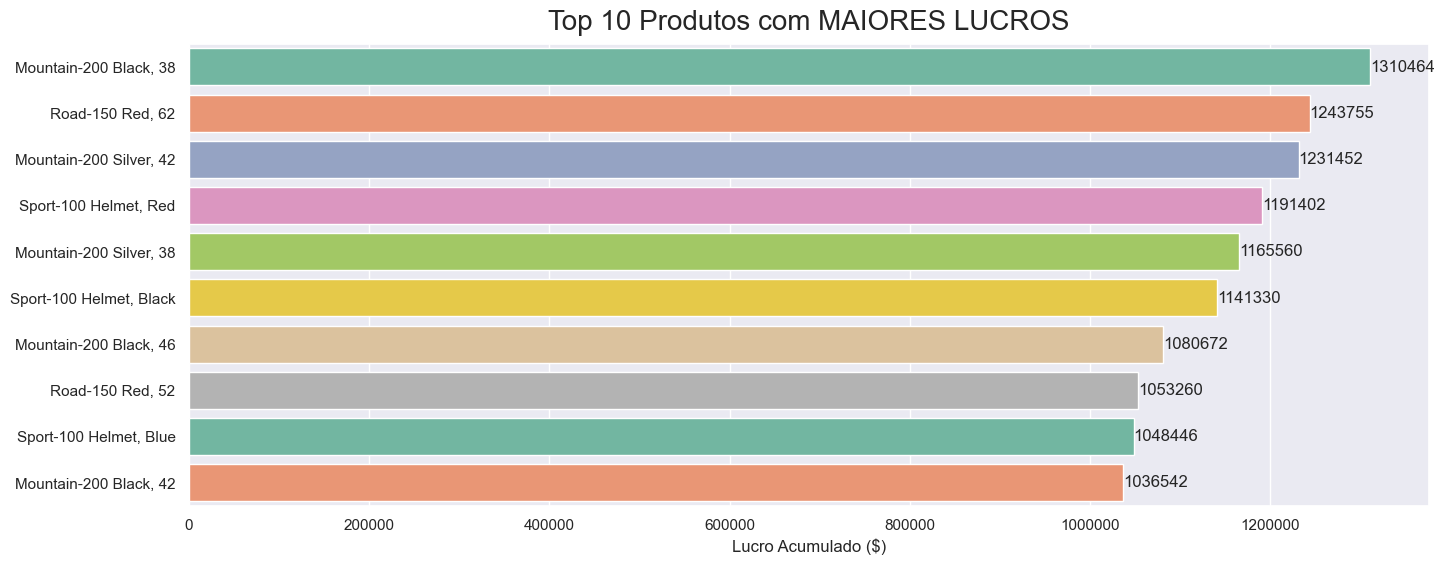

In [39]:
plt.figure(figsize=(16,6), dpi=100)

plt.xticks(rotation=0)
ax = sns.barplot(y = sales_maiores_lucro.index , x = sales_maiores_lucro['Profit'], data = sales_maiores_lucro, palette="Set2")
ax.bar_label(ax.containers[0], fmt = '%d')
plt.title( "Top 10 Produtos com MAIORES LUCROS" , fontsize=20, pad=10) 
plt.ylabel( "" , size = 12 )
plt.xlabel( "Lucro Acumulado ($)" , size = 12 ) 
plt.ticklabel_format(style='plain', axis='x')

In [40]:
prod = sales_maiores_lucro.index[0]
sales_prod_lucro = sales.loc[(sales['Product'] == prod)].groupby('Product')[['Profit']].sum()
prod_lucrativo = sales_prod_lucro['Profit'].to_list()
prod_lucrativo = prod_lucrativo[0]
total_lucro = sales['Profit'].sum()
porcentagem_do_mais_lucrativo = (prod_lucrativo/total_lucro) *100
print(f"O produto '{prod}' representa cerca de %d%% do total sobre o lucro de vendas" %porcentagem_do_mais_lucrativo)

O produto 'Mountain-200 Black, 38' representa cerca de 4% do total sobre o lucro de vendas


### 8) Quais produtos geram MENORES RECEITAS?

In [41]:
sales_menores_receita = sales.groupby('Product')[['Order_Quantity','Revenue']].sum()
sales_menores_receita = sales_menores_receita.sort_values(by='Revenue', ascending=True)
sales_menores_receita = sales_menores_receita.iloc[:10]

In [42]:
sales_menores_receita.head()

,Order_Quantity,Revenue
Product,,
"Mountain-500 Black, 52",40,19287
"Mountain-500 Silver, 48",52,25794
"Road-650 Red, 52",52,34669
"Touring-3000 Blue, 50",70,45694
"Mountain-500 Silver, 44",96,49638


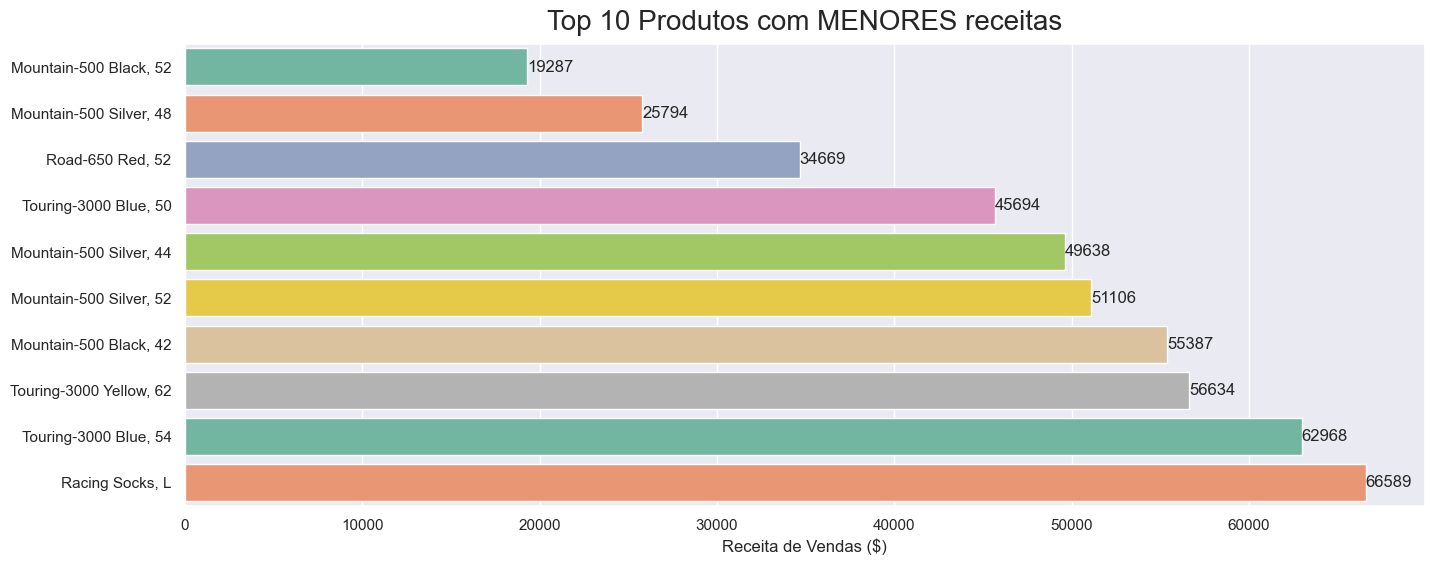

In [43]:
plt.figure(figsize=(16,6), dpi=100)

plt.xticks(rotation=0)
ax = sns.barplot(y = sales_menores_receita.index , x = sales_menores_receita['Revenue'], data = sales_menores_receita, palette="Set2")
ax.bar_label(ax.containers[0], fmt = '%d')
plt.title( "Top 10 Produtos com MENORES receitas" , fontsize=20, pad=10) 
plt.ylabel( "" , size = 12 )
plt.xlabel( "Receita de Vendas ($)" , size = 12 ) 
plt.ticklabel_format(style='plain', axis='x')

### 9) Quais produtos geram MENORES LUCROS?

In [44]:
sales_menores_lucro = sales.groupby('Product')[['Profit']].sum()
sales_menores_lucro = sales_menores_lucro.sort_values(by='Profit', ascending=True)
sales_menores_lucro = sales_menores_lucro.iloc[:10]

In [45]:
sales_menores_lucro.head()

,Profit
Product,
"Mountain-500 Black, 52",7487
"Road-650 Red, 52",9345
"Mountain-500 Silver, 48",9778
"Touring-3000 Blue, 50",13424
"Touring-3000 Yellow, 62",18371


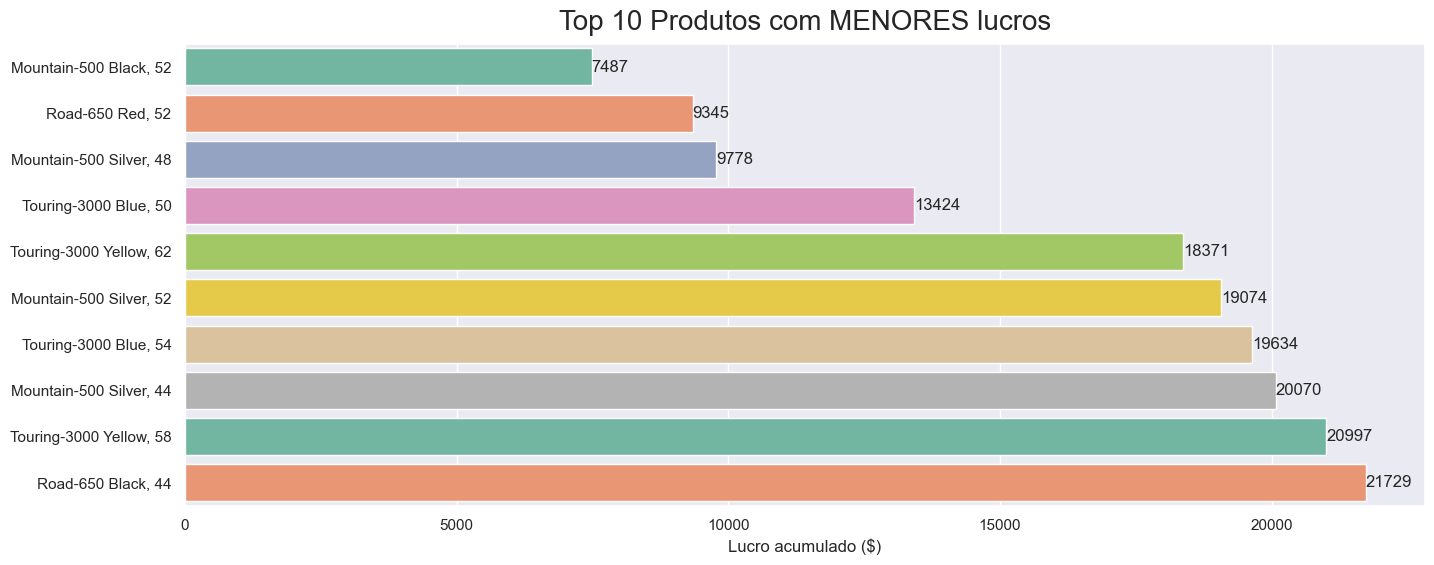

In [46]:
plt.figure(figsize=(16,6), dpi=100)

plt.xticks(rotation=0)
ax = sns.barplot(y = sales_menores_lucro.index , x = sales_menores_lucro['Profit'], data = sales_menores_lucro, palette="Set2")
ax.bar_label(ax.containers[0], fmt = '%d')
plt.title( "Top 10 Produtos com MENORES lucros" , fontsize=20, pad=10) 
plt.ylabel( "" , size = 12 )
plt.xlabel( "Lucro acumulado ($)" , size = 12 ) 
plt.ticklabel_format(style='plain', axis='x')

### 10) Quais os produtos que apresentam melhores margens de lucros?

In [47]:
sales2 = sales.copy()

In [48]:
# Criando nova coluna com a margem de lucro:
sales2['Profit_Margin'] = (((sales2['Revenue'] - sales2['Cost'])/sales2['Revenue'])*100)

In [49]:
sales2.head(2)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Profit_Margin
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,62.105263
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,62.105263


In [50]:
sales_margin = sales2.groupby('Product')[['Profit_Margin']].mean()
sales_margin= sales_margin.sort_values(by='Profit_Margin', ascending=False)
sales_margin = sales_margin.iloc[:10]

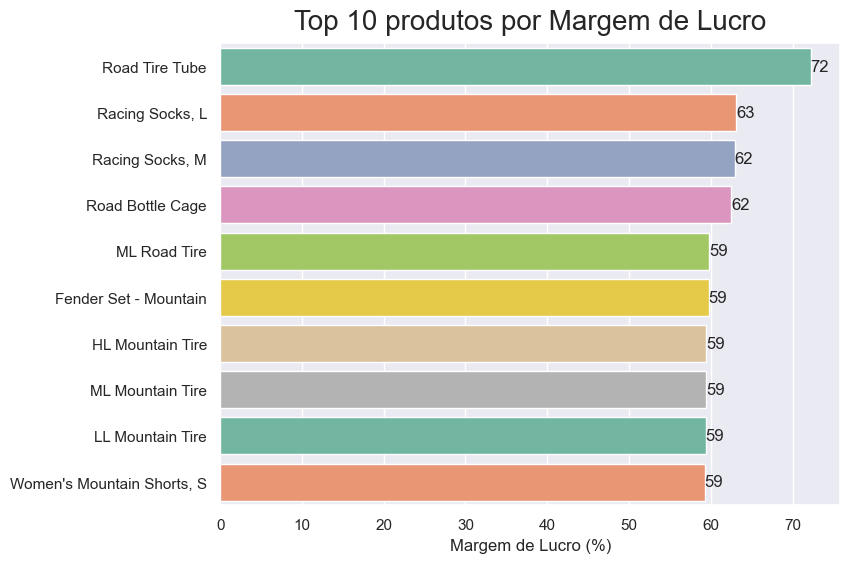

In [51]:
plt.figure(figsize=(8,6), dpi=100)

plt.xticks(rotation=0)
ax = sns.barplot(y = sales_margin.index , x = sales_margin['Profit_Margin'], data = sales_margin, palette="Set2")
ax.bar_label(ax.containers[0], fmt = '%d')
plt.title( "Top 10 produtos por Margem de Lucro" , fontsize=20, pad=10) 
plt.ylabel( "" , size = 12 )
plt.xlabel( "Margem de Lucro (%)" , size = 12 ) 
plt.ticklabel_format(style='plain', axis='x')


## Conhecendo os consumidores:

### 11) Analisando as características dos clientes:

In [52]:
sales[['Customer_Age']].describe()

,Customer_Age
count,113036.000000
mean,35.919212
std,11.021936
min,17.000000
25%,28.000000
50%,35.000000
75%,43.000000
max,87.000000


##### Verificando dados por Histograma:

Text(0.5, 0, 'Dollars')

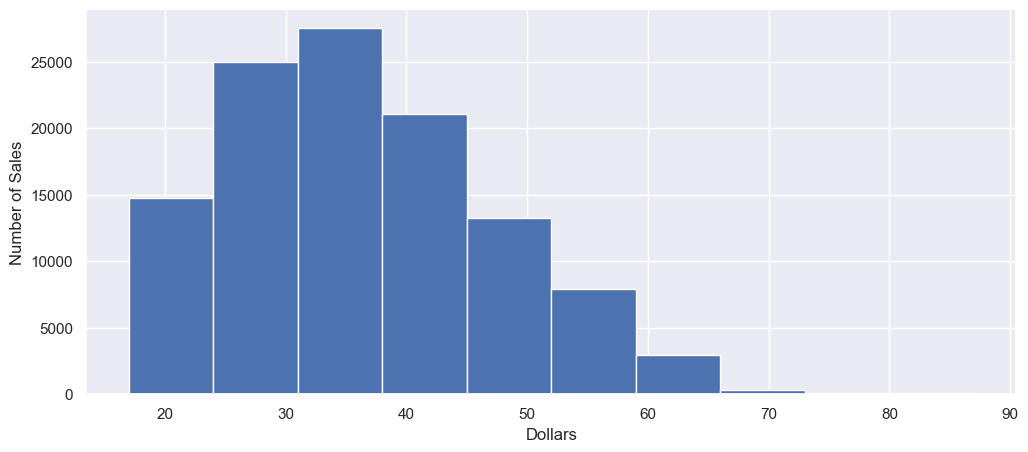

In [53]:
ax = sales['Customer_Age'].plot(kind='hist', figsize=(12,5))
ax.set_ylabel('Number of Sales')
ax.set_xlabel('Dollars')

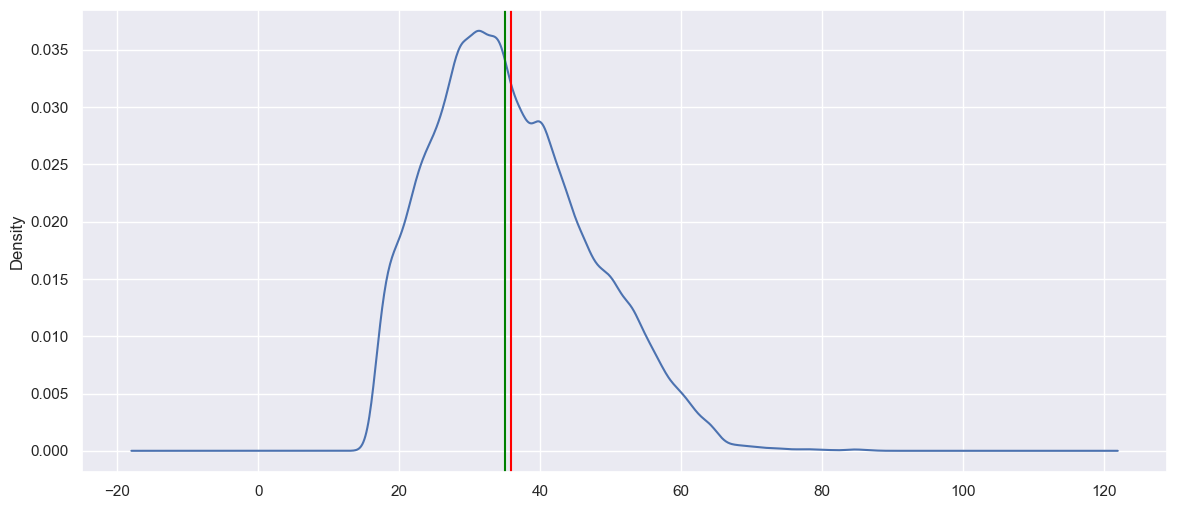

In [54]:
ax = sales['Customer_Age'].plot(kind='density') # kde
ax.axvline(sales['Customer_Age'].mean(), color='red')
ax.axvline(sales['Customer_Age'].median(), color='green')

In [46]:
sales['Customer_Age'].mean()

35.91921157861212

In [47]:
sales['Customer_Age'].median()

35.0

<AxesSubplot:>

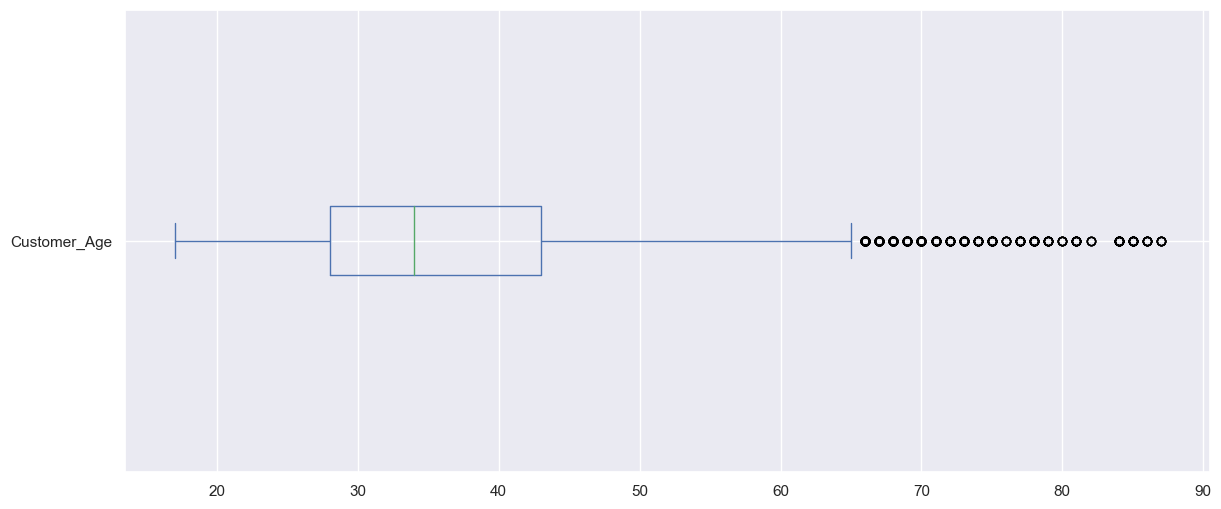

In [20]:
sales['Customer_Age'].plot(kind='box', vert=False, figsize=(14,6))

### 12) Analisando Clientes por localização:

In [61]:
sales.groupby('Country')[['Order_Quantity','Profit','Revenue']].sum().sort_values(by='Revenue', ascending=False)

,Order_Quantity,Profit,Revenue
Country,,,
United States,477539,11073644,27975547
Australia,263585,6776030,21302059
United Kingdom,157218,4413853,10646196
Germany,125720,3359995,8978596
France,128995,2880282,8432872
Canada,192259,3717296,7935738


In [159]:
sales.groupby('State')[['Order_Quantity','Revenue']].sum().sort_values(by='Revenue', ascending=False)

,Order_Quantity,Revenue
State,,
California,269759,17672620
England,157218,10646196
New South Wales,115932,9203495
British Columbia,191556,7877890
Washington,137947,6741510
Queensland,57592,5066267
Victoria,66231,5054839
Oregon,67012,3450410
Hessen,26382,2073391


### 13) Enxergando quais grupos etários produzem maiores receitas:

In [93]:
sales_age_group = sales.groupby('Age_Group')[['Revenue']].sum()
sales_age_group = sales_age_group.sort_values(by='Revenue', ascending=False)

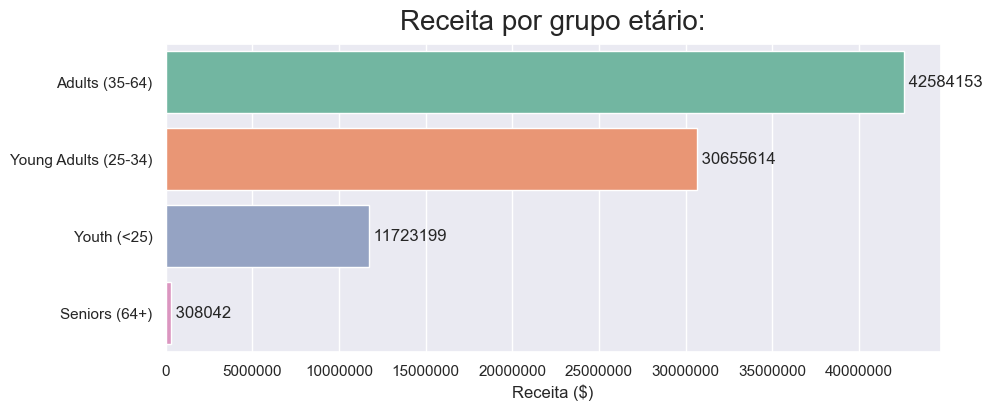

In [94]:
plt.figure(figsize=(10,4), dpi=100)

plt.xticks(rotation=0)
ax = sns.barplot(y = sales_age_group.index , x = sales_age_group['Revenue'], data = sales_age_group, palette="Set2")
ax.bar_label(ax.containers[0], fmt = ' %d')
plt.title( "Receita por grupo etário:" , fontsize=20, pad=10) 
plt.ylabel( "" , size = 12 )
plt.xlabel( "Receita ($)" , size = 12 ) 
plt.ticklabel_format(style='plain', axis='x')


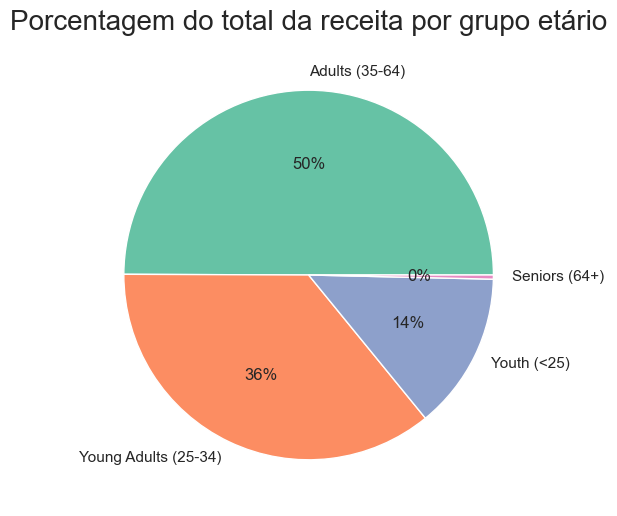

In [104]:
colors = sns.color_palette("Set2")
plt.figure(figsize=(16,6), dpi=100)

plt.pie(sales_age_group['Revenue'], labels = sales_age_group.index, autopct='%.0f%%', colors = colors)
plt.ylabel("", size = 12)
#plt.xlabel("Porcentagem de vendas", size = 12)
plt.title("Porcentagem do total da receita por grupo etário", fontsize=20, pad=10)

plt.show()

In [96]:
sales.groupby("Age_Group")[['Order_Quantity','Profit','Revenue']].aggregate([min,max,sum,'mean'])

Order_Quantity                        Profit         \
                                min max     sum       mean    min    max   
Age_Group                                                                  
Adults (35-64)                    1  32  672417  12.045303    -24  15096   
Seniors (64+)                     1  31    9877  13.530137      0   5638   
Young Adults (25-34)              1  32  446875  11.560899    -30   5485   
Youth (<25)                       1  32  216147  12.124018    -16   5628   

                                           Revenue                   \
                           sum        mean     min    max       sum   
Age_Group                                                             
Adults (35-64)        16321582  292.375717       2  58074  42584153   
Seniors (64+)           138165  189.267123       2  13230    308042   
Young Adults (25-34)  11386761  294.581699       2  14169  30655614   
Youth (<25)            4374592  245.377608       2  14312  11723199   

                                  
                            mean  
Age_Group                         
Adults (35-64)        762.828765  
Seniors (64+)         421.975342  
Young Adults (25-34)  793.077405  
Youth (<25)           657.572302

### 14) Conhecendo as principais compras de cada faixa etária:

<h4 align="center"> Adults (35-64) </h4>

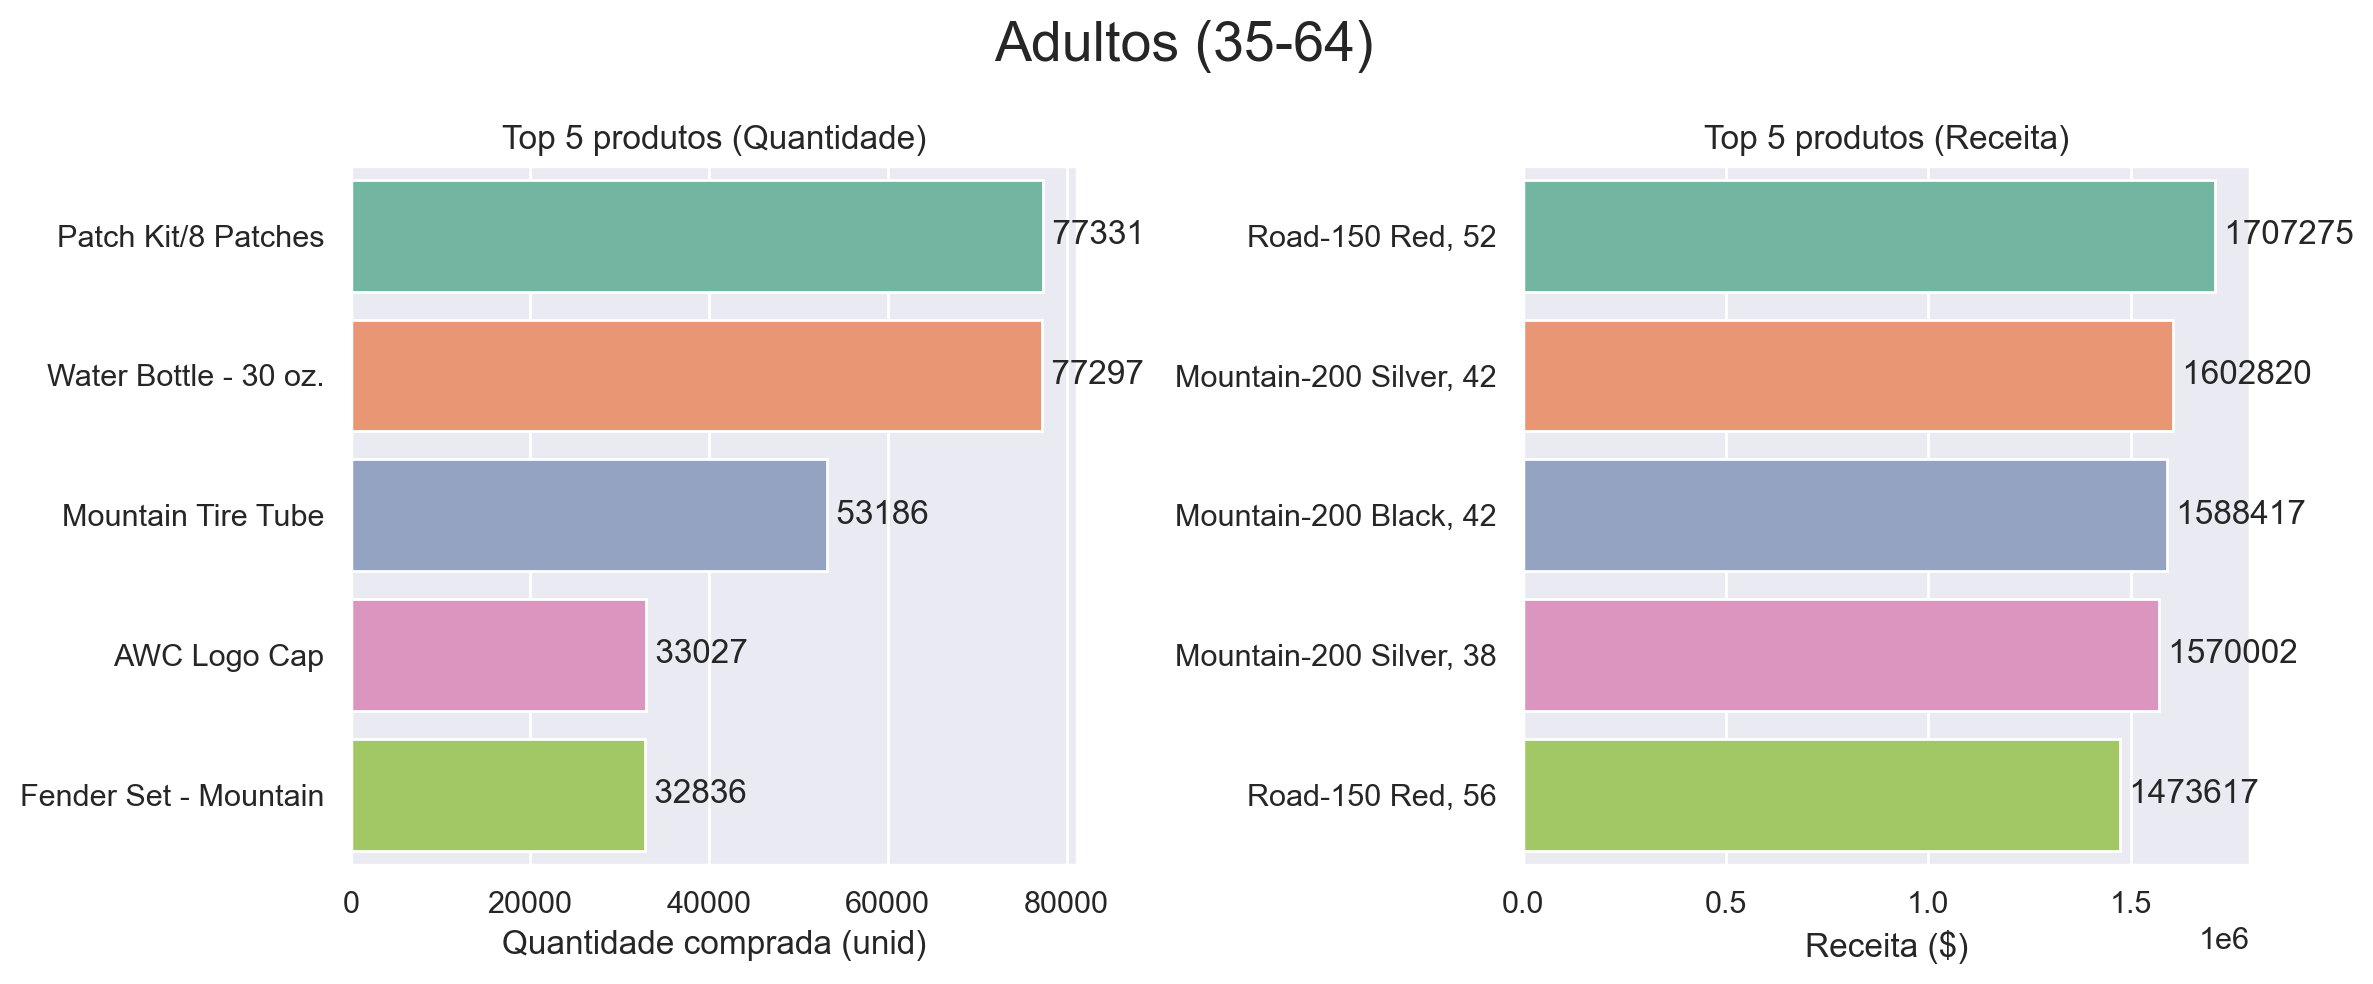

In [126]:
sales_adult = sales.loc[sales['Age_Group'] =='Adults (35-64)'].groupby('Product')[['Order_Quantity','Profit','Revenue']].sum()
sales_adult = sales_adult.sort_values(by='Order_Quantity', ascending=False)
sales_adult = sales_adult.iloc[:5,:]

sales_adult2 = sales.loc[sales['Age_Group'] =='Adults (35-64)'].groupby('Product')[['Order_Quantity','Profit','Revenue']].sum()
sales_adult2 = sales_adult2.sort_values(by='Revenue', ascending=False)
sales_adult2 = sales_adult2.iloc[:5,:]

fig, axes = plt.subplots(1, 2, figsize=(12,5), dpi=200)

ax = sns.barplot(ax=axes[0], y = sales_adult.index , x = sales_adult['Order_Quantity'], data = sales_adult, palette="Set2")
ax.bar_label(ax.containers[0], fmt = ' %d')
ax.set_ylabel('')
ax.set_xlabel('Quantidade comprada (unid)')
axes[0].set_title('Top 5 produtos (Quantidade)')

ax = sns.barplot(ax=axes[1], y = sales_adult2.index , x = sales_adult2['Revenue'], data = sales_adult, palette="Set2")
axes[1].set_title('Top 5 produtos (Receita)')
ax.set_ylabel('')
ax.set_xlabel('Receita ($)')
ax.bar_label(ax.containers[0], fmt = ' %d')

fig.suptitle('Adultos (35-64)', size = 20)

fig.tight_layout()

plt.show()

<h4 align="center"> Jovens Adultos (25-34) </h4>

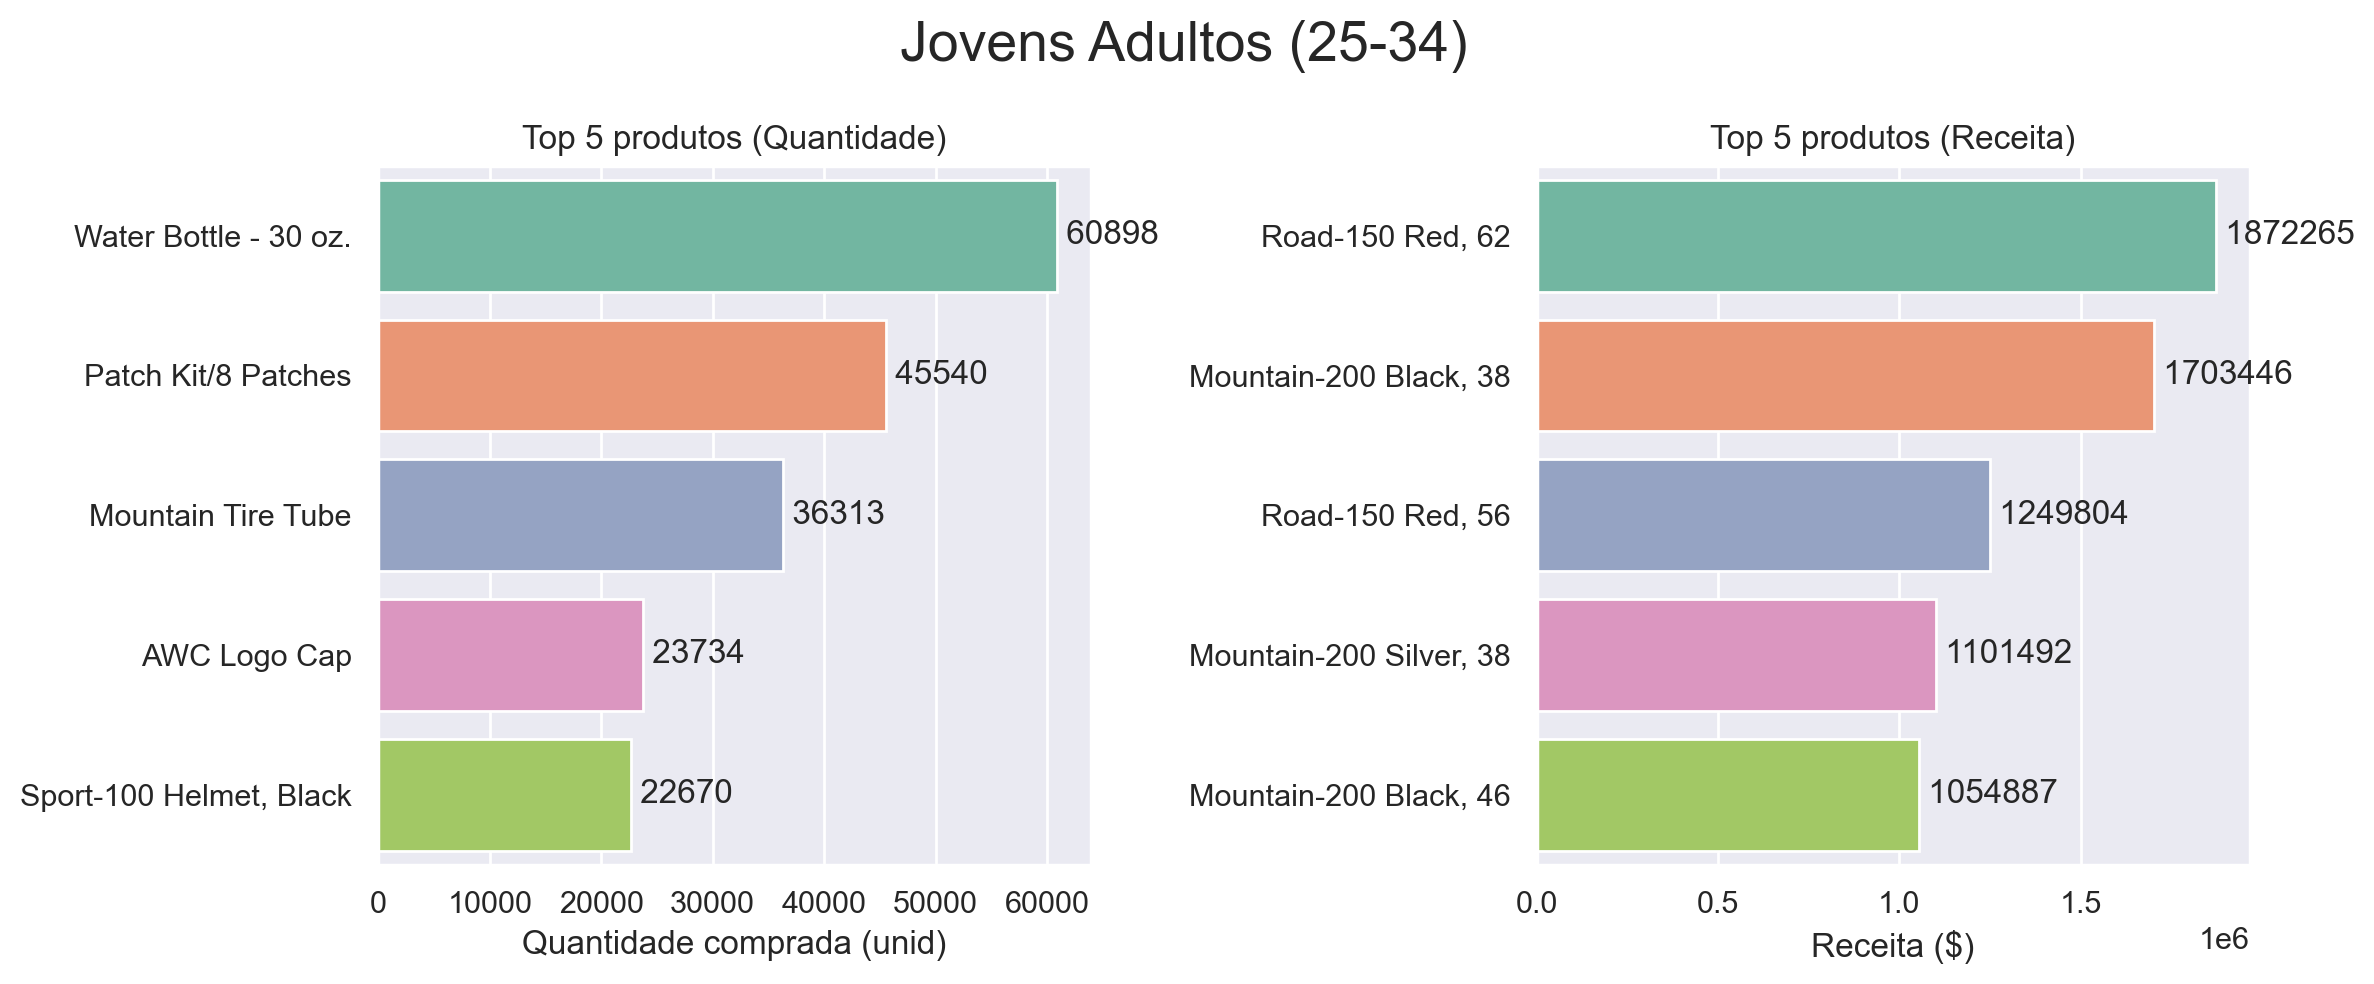

In [125]:
sales_1 = sales.loc[sales['Age_Group'] =='Young Adults (25-34)'].groupby('Product')[['Order_Quantity','Profit','Revenue']].sum()
sales_1 = sales_1.sort_values(by='Order_Quantity', ascending=False)
sales_1 = sales_1.iloc[:5,:]

sales_2 = sales.loc[sales['Age_Group'] =='Young Adults (25-34)'].groupby('Product')[['Order_Quantity','Profit','Revenue']].sum()
sales_2 = sales_2.sort_values(by='Revenue', ascending=False)
sales_2 = sales_2.iloc[:5,:]

fig, axes = plt.subplots(1, 2, figsize=(12,5), dpi=200)

ax = sns.barplot(ax=axes[0], y = sales_1.index , x = sales_1['Order_Quantity'], data = sales_1, palette="Set2")
ax.bar_label(ax.containers[0], fmt = ' %d')
ax.set_ylabel('')
ax.set_xlabel('Quantidade comprada (unid)')
axes[0].set_title('Top 5 produtos (Quantidade)')

ax = sns.barplot(ax=axes[1], y = sales_2.index , x = sales_2['Revenue'], data = sales_2, palette="Set2")
axes[1].set_title('Top 5 produtos (Receita)')
ax.set_ylabel('')
ax.set_xlabel('Receita ($)')
ax.bar_label(ax.containers[0], fmt = ' %d')

fig.suptitle('Jovens Adultos (25-34)', size = 20)

fig.tight_layout()

plt.show()

<h4 align="center"> Jovens (<25) </h4>

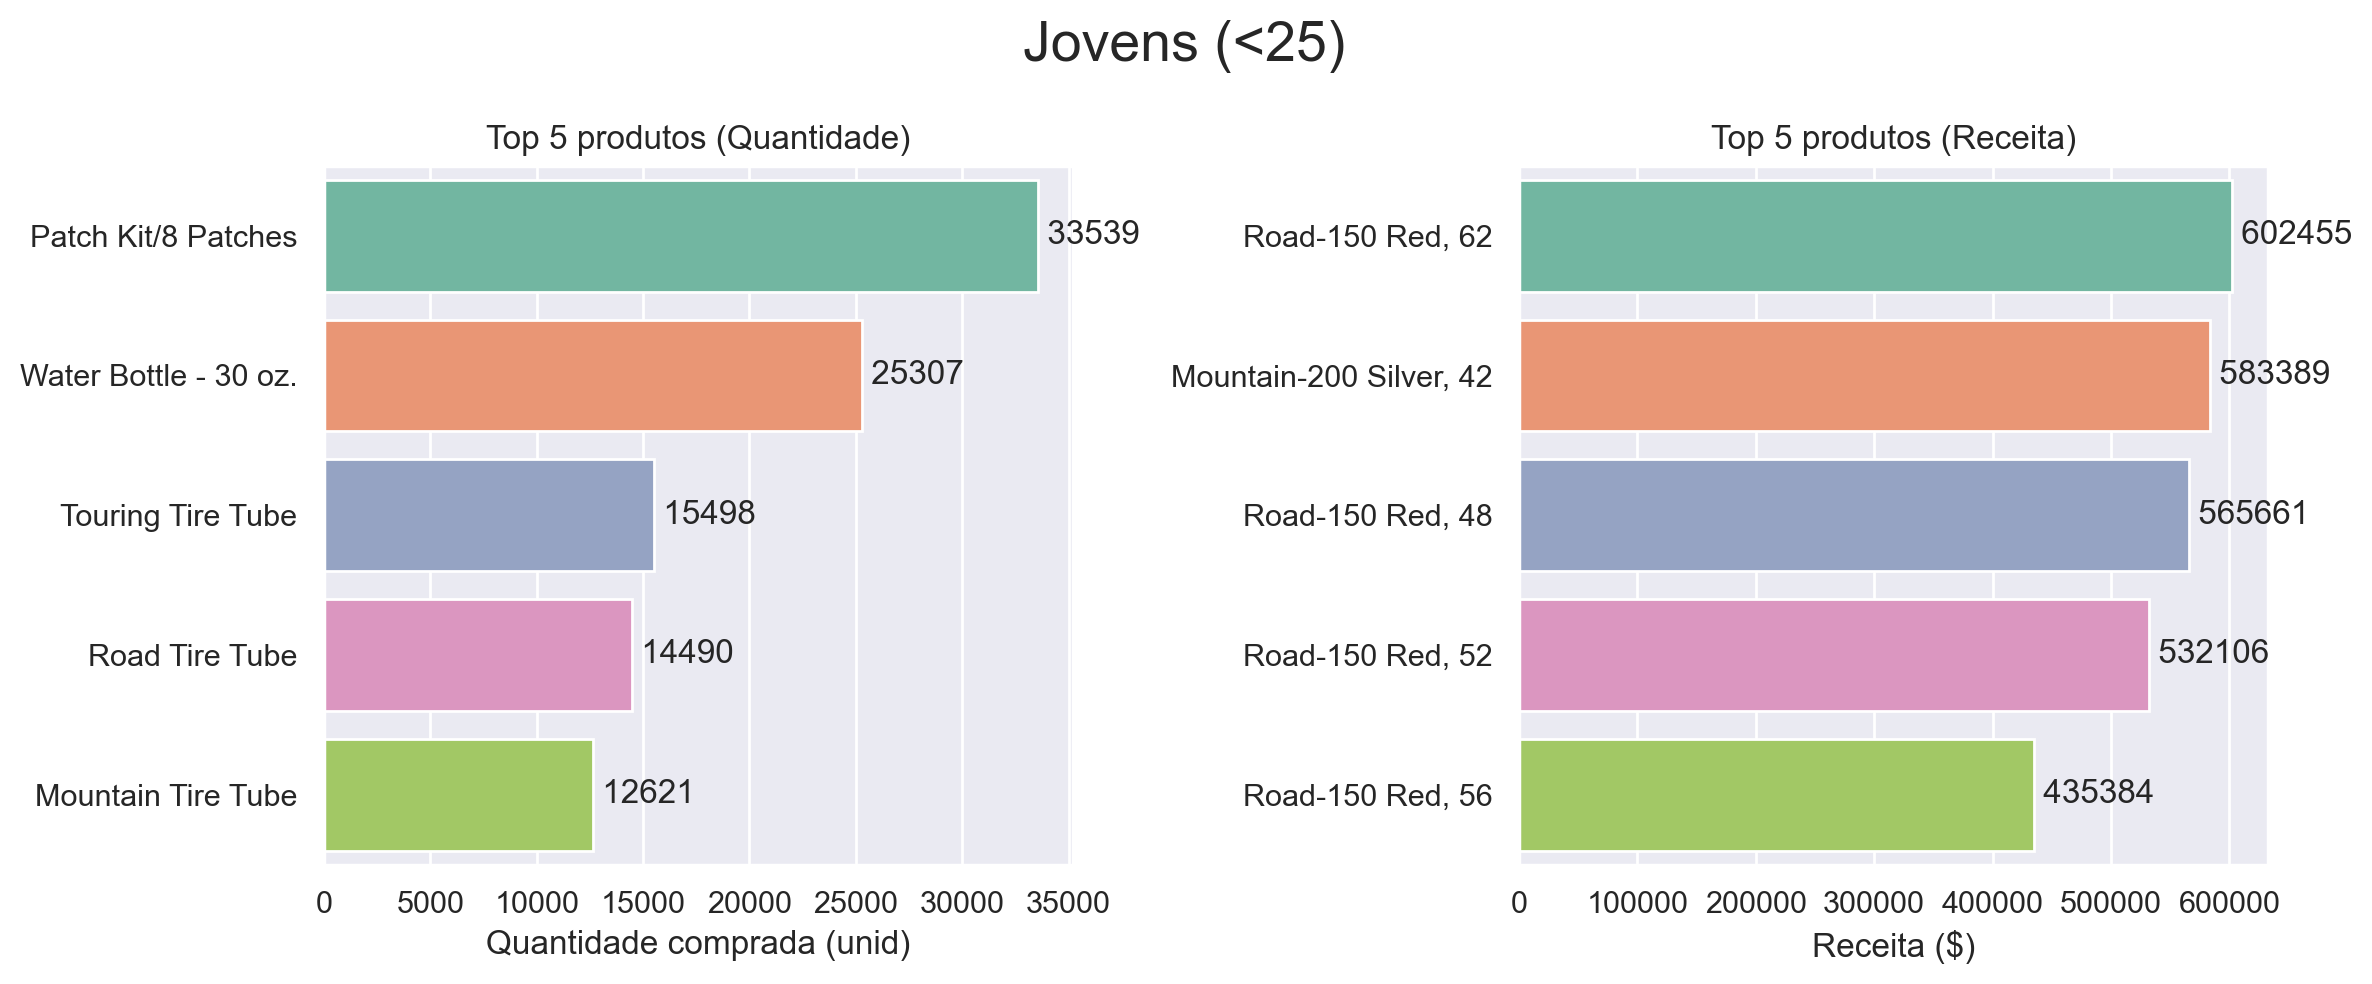

In [124]:
sales_1 = sales.loc[sales['Age_Group'] =='Youth (<25)'].groupby('Product')[['Order_Quantity','Profit','Revenue']].sum()
sales_1 = sales_1.sort_values(by='Order_Quantity', ascending=False)
sales_1 = sales_1.iloc[:5,:]

sales_2 = sales.loc[sales['Age_Group'] =='Youth (<25)'].groupby('Product')[['Order_Quantity','Profit','Revenue']].sum()
sales_2 = sales_2.sort_values(by='Revenue', ascending=False)
sales_2 = sales_2.iloc[:5,:]

fig, axes = plt.subplots(1, 2, figsize=(12,5), dpi=200)

ax = sns.barplot(ax=axes[0], y = sales_1.index , x = sales_1['Order_Quantity'], data = sales_1, palette="Set2")
ax.bar_label(ax.containers[0], fmt = ' %d')
ax.set_ylabel('')
ax.set_xlabel('Quantidade comprada (unid)')
axes[0].set_title('Top 5 produtos (Quantidade)')

ax = sns.barplot(ax=axes[1], y = sales_2.index , x = sales_2['Revenue'], data = sales_2, palette="Set2")
axes[1].set_title('Top 5 produtos (Receita)')
ax.set_ylabel('')
ax.set_xlabel('Receita ($)')
ax.bar_label(ax.containers[0], fmt = ' %d')

fig.suptitle('Jovens (<25)', size = 20)

fig.tight_layout()

plt.show()

<h4 align="center"> Idosos (64+) </h4)

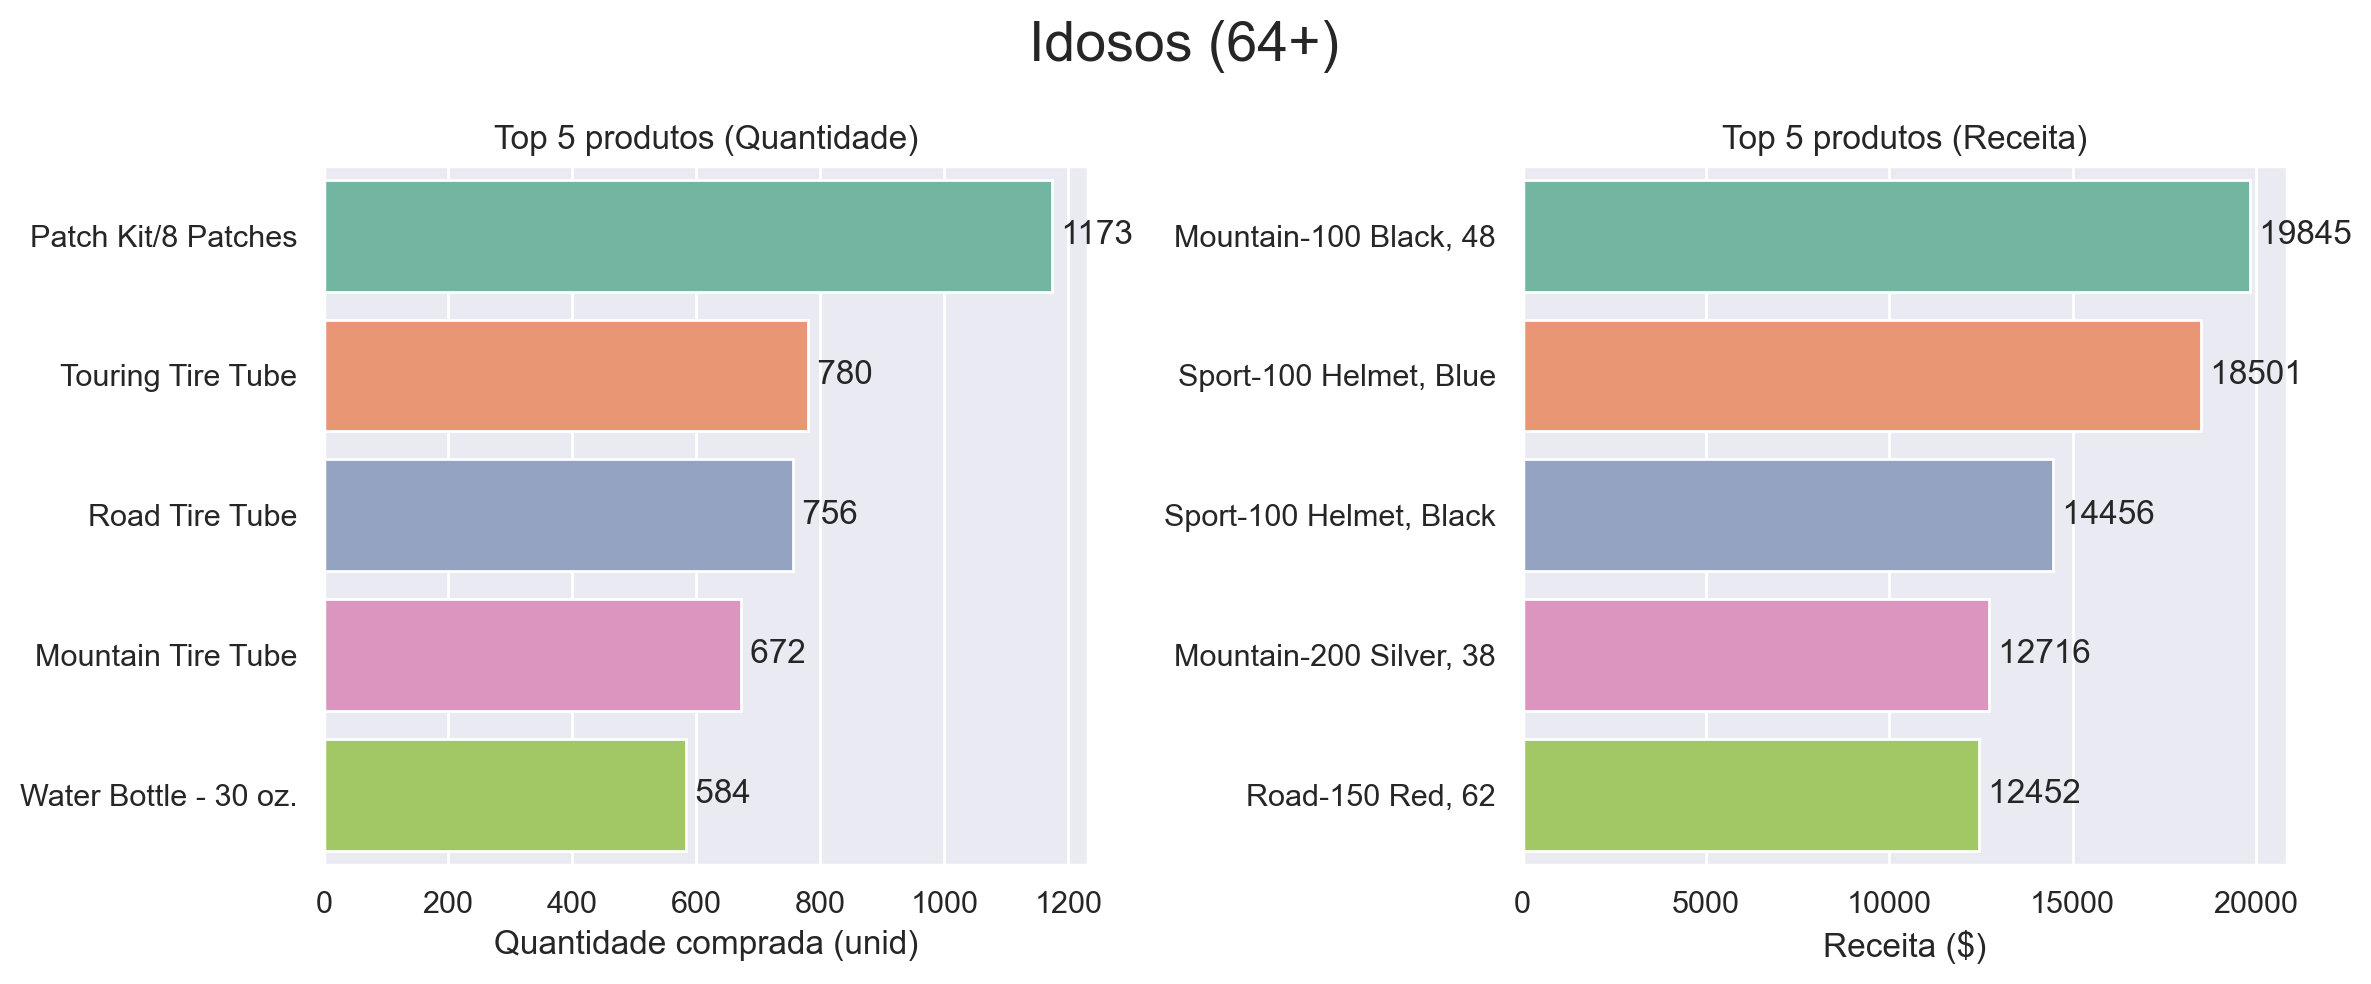

In [123]:
sales_1 = sales.loc[sales['Age_Group'] =='Seniors (64+)'].groupby('Product')[['Order_Quantity','Profit','Revenue']].sum()
sales_1 = sales_1.sort_values(by='Order_Quantity', ascending=False)
sales_1 = sales_1.iloc[:5,:]

sales_2 = sales.loc[sales['Age_Group'] =='Seniors (64+)'].groupby('Product')[['Order_Quantity','Profit','Revenue']].sum()
sales_2 = sales_2.sort_values(by='Revenue', ascending=False)
sales_2 = sales_2.iloc[:5,:]

fig, axes = plt.subplots(1, 2, figsize=(12,5), dpi=200)

ax = sns.barplot(ax=axes[0], y = sales_1.index , x = sales_1['Order_Quantity'], data = sales_1, palette="Set2")
ax.bar_label(ax.containers[0], fmt = ' %d')
ax.set_ylabel('')
ax.set_xlabel('Quantidade comprada (unid)')
axes[0].set_title('Top 5 produtos (Quantidade)')

ax = sns.barplot(ax=axes[1], y = sales_2.index , x = sales_2['Revenue'], data = sales_2, palette="Set2")
axes[1].set_title('Top 5 produtos (Receita)')
ax.set_ylabel('')
ax.set_xlabel('Receita ($)')
ax.bar_label(ax.containers[0], fmt = ' %d')

fig.suptitle('Idosos (64+)', size = 20)

fig.tight_layout()

plt.show()

### 15) Diferencial de compras em relação ao sexo dos clientes:

In [70]:
sales.groupby('Customer_Gender')[['Order_Quantity','Profit','Revenue']].sum().sort_values(by='Revenue', ascending=False)

,Order_Quantity,Profit,Revenue
Customer_Gender,,,
M,699583,16487232,43335409
F,645733,15733868,41935599


In [87]:
sales_gender = sales.groupby('Customer_Gender')[['Revenue']].sum()
sales_gender = sales_gender.sort_values(by='Revenue', ascending=False)

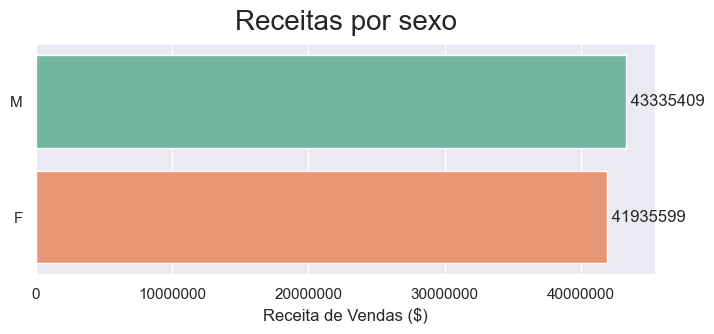

In [88]:
plt.figure(figsize=(8,3), dpi=100)

plt.xticks(rotation=0)
ax = sns.barplot(y = sales_gender.index , x = sales_gender['Revenue'], data = sales_gender, palette="Set2")
ax.bar_label(ax.containers[0], fmt = ' %d')
plt.title( "Receitas por sexo" , fontsize=20, pad=10) 
plt.ylabel( "" , size = 12 )
plt.xlabel( "Receita de Vendas ($)" , size = 12 ) 
plt.ticklabel_format(style='plain', axis='x')

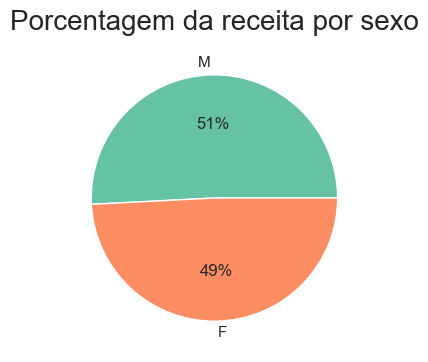

In [73]:
colors = sns.color_palette("Set2")
plt.figure(figsize=(16,4), dpi=100)

plt.pie(sales_gender['Revenue'], labels = sales_gender.index, autopct='%.0f%%', colors = colors)
plt.ylabel("", size = 12)
#plt.xlabel("Porcentagem de vendas", size = 12)
plt.title("Porcentagem da receita por sexo", fontsize=20, pad=10)

plt.show()

## Conclusões Finais

Neste estudo de caso foi revelado os **produtos mais rentáveis**, assim como os **mais comprados** e também aqueles **menos procurados** pelos consumidores. Foi demonstrado  também, quais **grupos de faixa etária são os principais consumidores**, além de encontrar a **localização de onde concentra-se as principais receitas de vendas**, entre outras informações. 

Tais descobertas servem de base para construção de **estratégias eficazes** e **responsivas as demandas**, o que converte-se em decisões mais **acertivas** e **eficientes**, alinhada as **necessidades reais** e as **especificidades do negócio**. Como por exemplo uma **boa manutenção dos estoque** nos periodos indentificados de **alta demanda**, ou a necessidade de manter **centros de distribuições próximos as localidades** que possuem maiores demandas, para assim diminuir os **custos logísticos** e manter **boas relações como os clientes** através de respostas mais rápidas.

Por meio desta **coleta e análise de dados**, foi possível identificar estes **padrões** e **tendências** de comportamento dos consumidores, entender melhor suas necessidades, suas preferências, e, assim, prover informações valiosas para o desenvolvvimento de **estratégias de negócios mais eficientes e bem direcionadas.**

Com isso, esta empresa se beneficia com decisões **mais acertivas**, **identificar oportunidades de crescimento** e **aumentar a sua eficiência operacional**, contribuindo portanto, para o seu sucesso a longo prazo.

(caso queira fazer algum comentário me envie um email: rodrigosantospinheiro@gmail.com)

<img src="https://i.postimg.cc/59wWj0fz/final.png" style="width:620px; height:360px">